<a href="https://www.kaggle.com/code/priyam8210/oe-case-study?scriptVersionId=197479067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/petro-well-data-oe/input_pilot_data.csv')
df1 = pd.read_excel('/kaggle/input/petro-well-data-oe/Checkshot_data_Gorgonichthys-1.xlsx')

In [3]:
df.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [4]:
pd.crosstab(df["Formation"], df["Facies"])
plt.savefig('result.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [5]:
df.shape

(4149, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [7]:
obj_col = ['Facies', 'Formation', 'Well Name']

In [8]:
for col in obj_col:
    print(df[col].value_counts())

Facies
2    940
3    780
8    686
6    582
5    296
4    271
1    268
9    185
7    141
Name: count, dtype: int64
Formation
C LM     662
A1 LM    591
A1 SH    422
C SH     392
B5 LM    362
B1 SH    335
B3 SH    270
B4 SH    259
B2 SH    212
B1 LM    210
B2 LM    176
B5 SH     96
B4 LM     88
B3 LM     74
Name: count, dtype: int64
Well Name
CROSS H CATTLE     501
SHRIMPLIN          471
ALEXANDER D        466
NEWBY              463
LUKE G U           461
SHANKLE            449
KIMZEY A           439
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          80
Name: count, dtype: int64


In [9]:
df.isnull().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df['formation'] = df['Formation'].str.split().str[-1]
df.drop(['Formation'], axis= 1, inplace =True)
df['formation'].value_counts()

formation
LM    1623
SH    1609
Name: count, dtype: int64

In [12]:
df['formation'] = df['formation'].map({'SH':0, 'LM':1})
df.head()

Facies  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND   PE  NM_M  \
0       3  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915  4.6     1   
1       3  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565  4.1     1   
2       3  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050  3.6     1   
3       3  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115  3.5     1   
4       3  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300  3.4     1   

   RELPOS  formation  
0   1.000          0  
1   0.979          0  
2   0.957          0  
3   0.936          0  
4   0.915          0

In [13]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [14]:
test_df = df.loc[df['Well Name'] == 'SHANKLE']
input_df = df.drop(df[df['Well Name'] == 'SHANKLE'].index)

In [15]:
input_df.isnull().sum()

Facies       0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
formation    0
dtype: int64

In [16]:
test_df.drop(['Depth', 'Well Name'], axis= 1, inplace= True)
test_df.shape

(449, 9)

In [17]:
well_name = input_df[['Well Name']]
input_df.drop(['Depth', 'Well Name'], axis=1, inplace=True)
input_df.shape

(2783, 9)

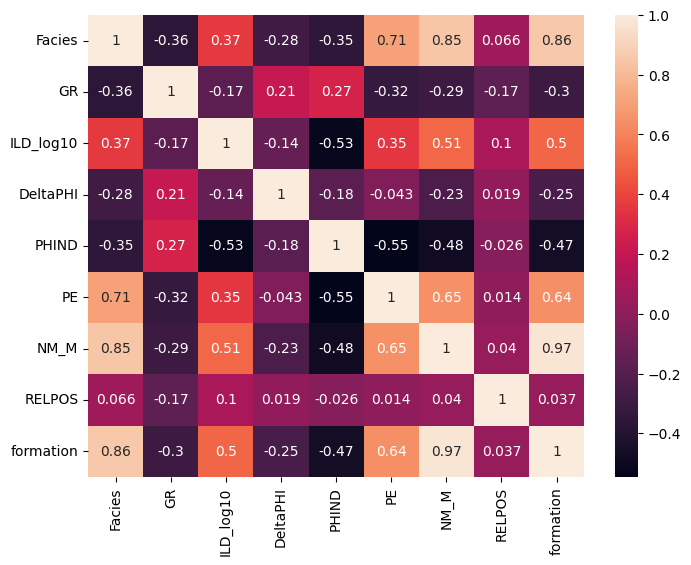

In [18]:
plt.figure(figsize=(8, 6))
cor_mat = input_df.corr()
sns.heatmap(cor_mat, annot=True)
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [19]:
input_df.drop(['formation'], axis=1, inplace= True)
test_df.drop(['formation'], axis=1, inplace= True)

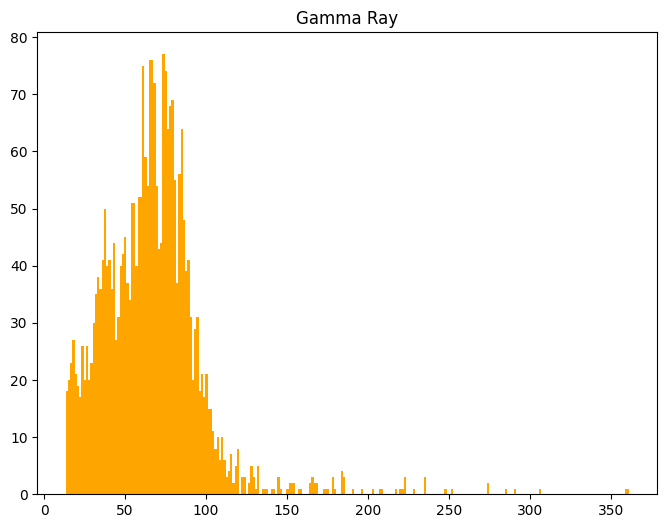

In [20]:
plt.figure(figsize=[8,6])
plt.hist(input_df['GR'], color='orange', bins= 250)
plt.title('Gamma Ray')
plt.show()

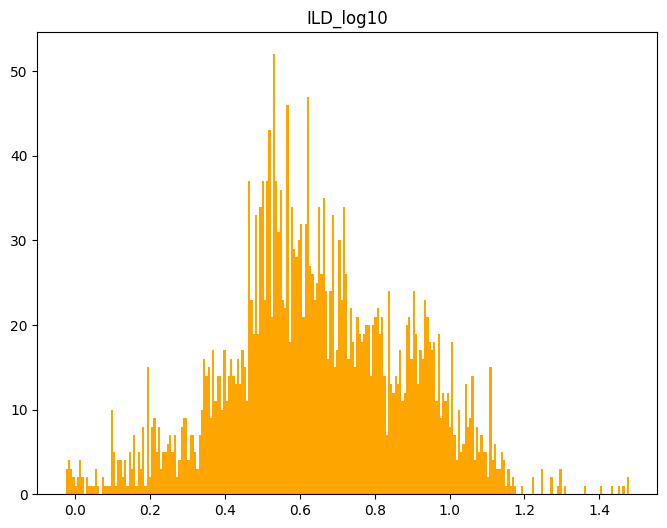

In [21]:
plt.figure(figsize=[8,6])
plt.hist(input_df['ILD_log10'], color='orange', bins= 250)
plt.title('ILD_log10')
plt.show()

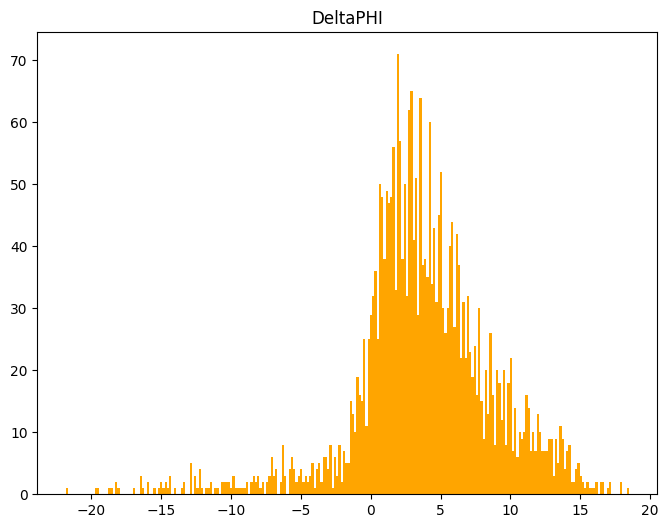

In [22]:
plt.figure(figsize=[8,6])
plt.hist(input_df['DeltaPHI'], color='orange', bins= 250)
plt.title('DeltaPHI')
plt.show()

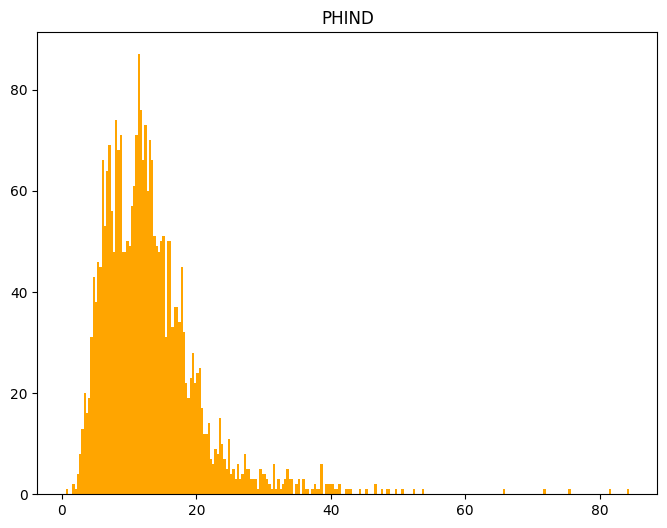

In [23]:
plt.figure(figsize=[8,6])
plt.hist(input_df['PHIND'], color='orange', bins= 250)
plt.title('PHIND')
plt.show()

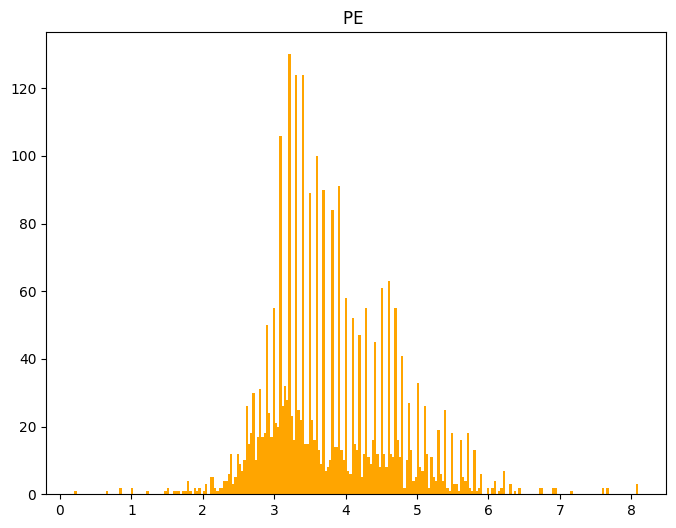

In [24]:
plt.figure(figsize=[8,6])
plt.hist(input_df['PE'], color='orange', bins= 250)
plt.title('PE ')
plt.show()

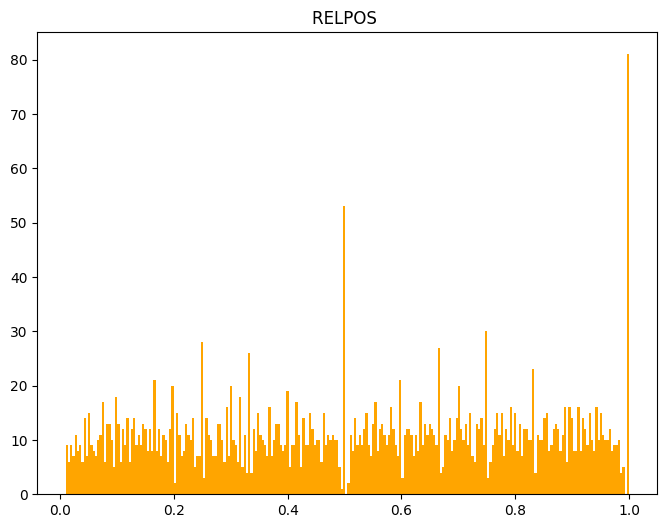

In [25]:
plt.figure(figsize=[8,6])
plt.hist(input_df['RELPOS'], color='orange', bins= 250)
plt.title('RELPOS ')
plt.show()

In [26]:
for col in input_df:
    print(col, '::', input_df[col].skew())

Facies :: 0.3323449934284629
GR :: 2.2263495176275194
ILD_log10 :: -0.006615820769608193
DeltaPHI :: -0.7202047992432936
PHIND :: 2.4155808918849484
PE :: 0.6533628581597909
NM_M :: -0.09574125520900498
RELPOS :: -0.043894088774046075


# ANN Model

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [28]:
input_df.shape

(2783, 8)

In [29]:
y_input = input_df['Facies']
x_input = input_df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]

In [30]:
y_test = test_df['Facies']
x_test = test_df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]

In [31]:
input_df['Facies'].dtype

dtype('int64')

In [32]:
y_input = pd.get_dummies(y_input).replace({False: 0, True: 1})


In [33]:
y_input.shape

(2783, 9)

In [34]:
y_input = y_input.to_numpy()
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()

In [35]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [36]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
x_scaled = scale.fit_transform(x_input)

In [37]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_scaled, y_input, test_size=.2, random_state = 9  )

In [38]:
xtr_ten = torch.tensor(x_tr, dtype=torch.float32)
xte_ten = torch.tensor(x_te, dtype=torch.float32)
ytr_ten = torch.tensor(y_tr, dtype=torch.float32)
yte_ten = torch.tensor(y_te, dtype=torch.float32)

x_te_ten = torch.tensor(x_test, dtype=torch.float32)
y_te_ten = torch.tensor(y_test, dtype=torch.float32)


In [39]:
dataset = CustomDataset(xtr_ten, ytr_ten)
val_dataset = CustomDataset(xte_ten, yte_ten)
test_dataset = CustomDataset(x_te_ten, y_te_ten)

In [40]:
batch_size = 64

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last = True)
val_data_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle= True, drop_last = True)
test_data_loader = DataLoader(test_dataset, batch_size = batch_size, drop_last = True)

In [41]:
class ann_model(nn.Module):
    def __init__(self, input_, output_):
        super(ann_model, self).__init__()
        self.fc1 = nn.Linear(input_, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [42]:
input_  = 5
output_ = 9

model = ann_model(input_, output_)

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [44]:
for batch in data_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [45]:
epochs = 1000

for epoch in range(epochs):
    for batch in data_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():  
    for batch in val_data_loader:
        inputs, labels = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted = torch.nn.functional.one_hot(predicted, num_classes=9)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

        
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = classification_report(true_labels, predicted_labels)


In [46]:
accuracy

0.630859375

In [47]:
f1

0.6295757461105147

In [48]:
conf_matrix
plt.savefig('result1.png', bbox_inches='tight', pad_inches=0.0)

<Figure size 640x480 with 0 Axes>

In [49]:
true_labels = []
predicted_labels = []

outputs = model(x_te_ten)
_, predicted = torch.max(outputs, 1)
#predicted = torch.nn.functional.one_hot(predicted, num_classes=9)
true_labels.extend(y_te_ten.numpy())
predicted_labels.extend(predicted.numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

In [50]:
accuracy

0.013363028953229399

# Support Vector Machine Model

In [51]:
from sklearn.svm import SVC

In [52]:
y_input = input_df['Facies']
x_input = input_df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]

In [53]:
y_test = test_df['Facies']
x_test = test_df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]

In [54]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
x_scaled = scale.fit_transform(x_input)

In [55]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_scaled, y_input, test_size=.2, random_state = 9  )

In [56]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(x_tr, y_tr)

SVC()

In [57]:
y_pred = svm_classifier.predict(x_te)
accuracy = accuracy_score(y_te, y_pred)
accuracy

0.5457809694793537

In [58]:
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
accuracy

0.26057906458797325

In [59]:
f1_score

array([0.        , 0.        , 0.41342756, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Clustering

In [60]:
input_df.columns

Index(['Facies', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'],
      dtype='object')

In [61]:
y_input = input_df[['Facies']]
x_input = input_df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']]

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

scale = StandardScaler()
x_scaled = scale.fit_transform(x_input)

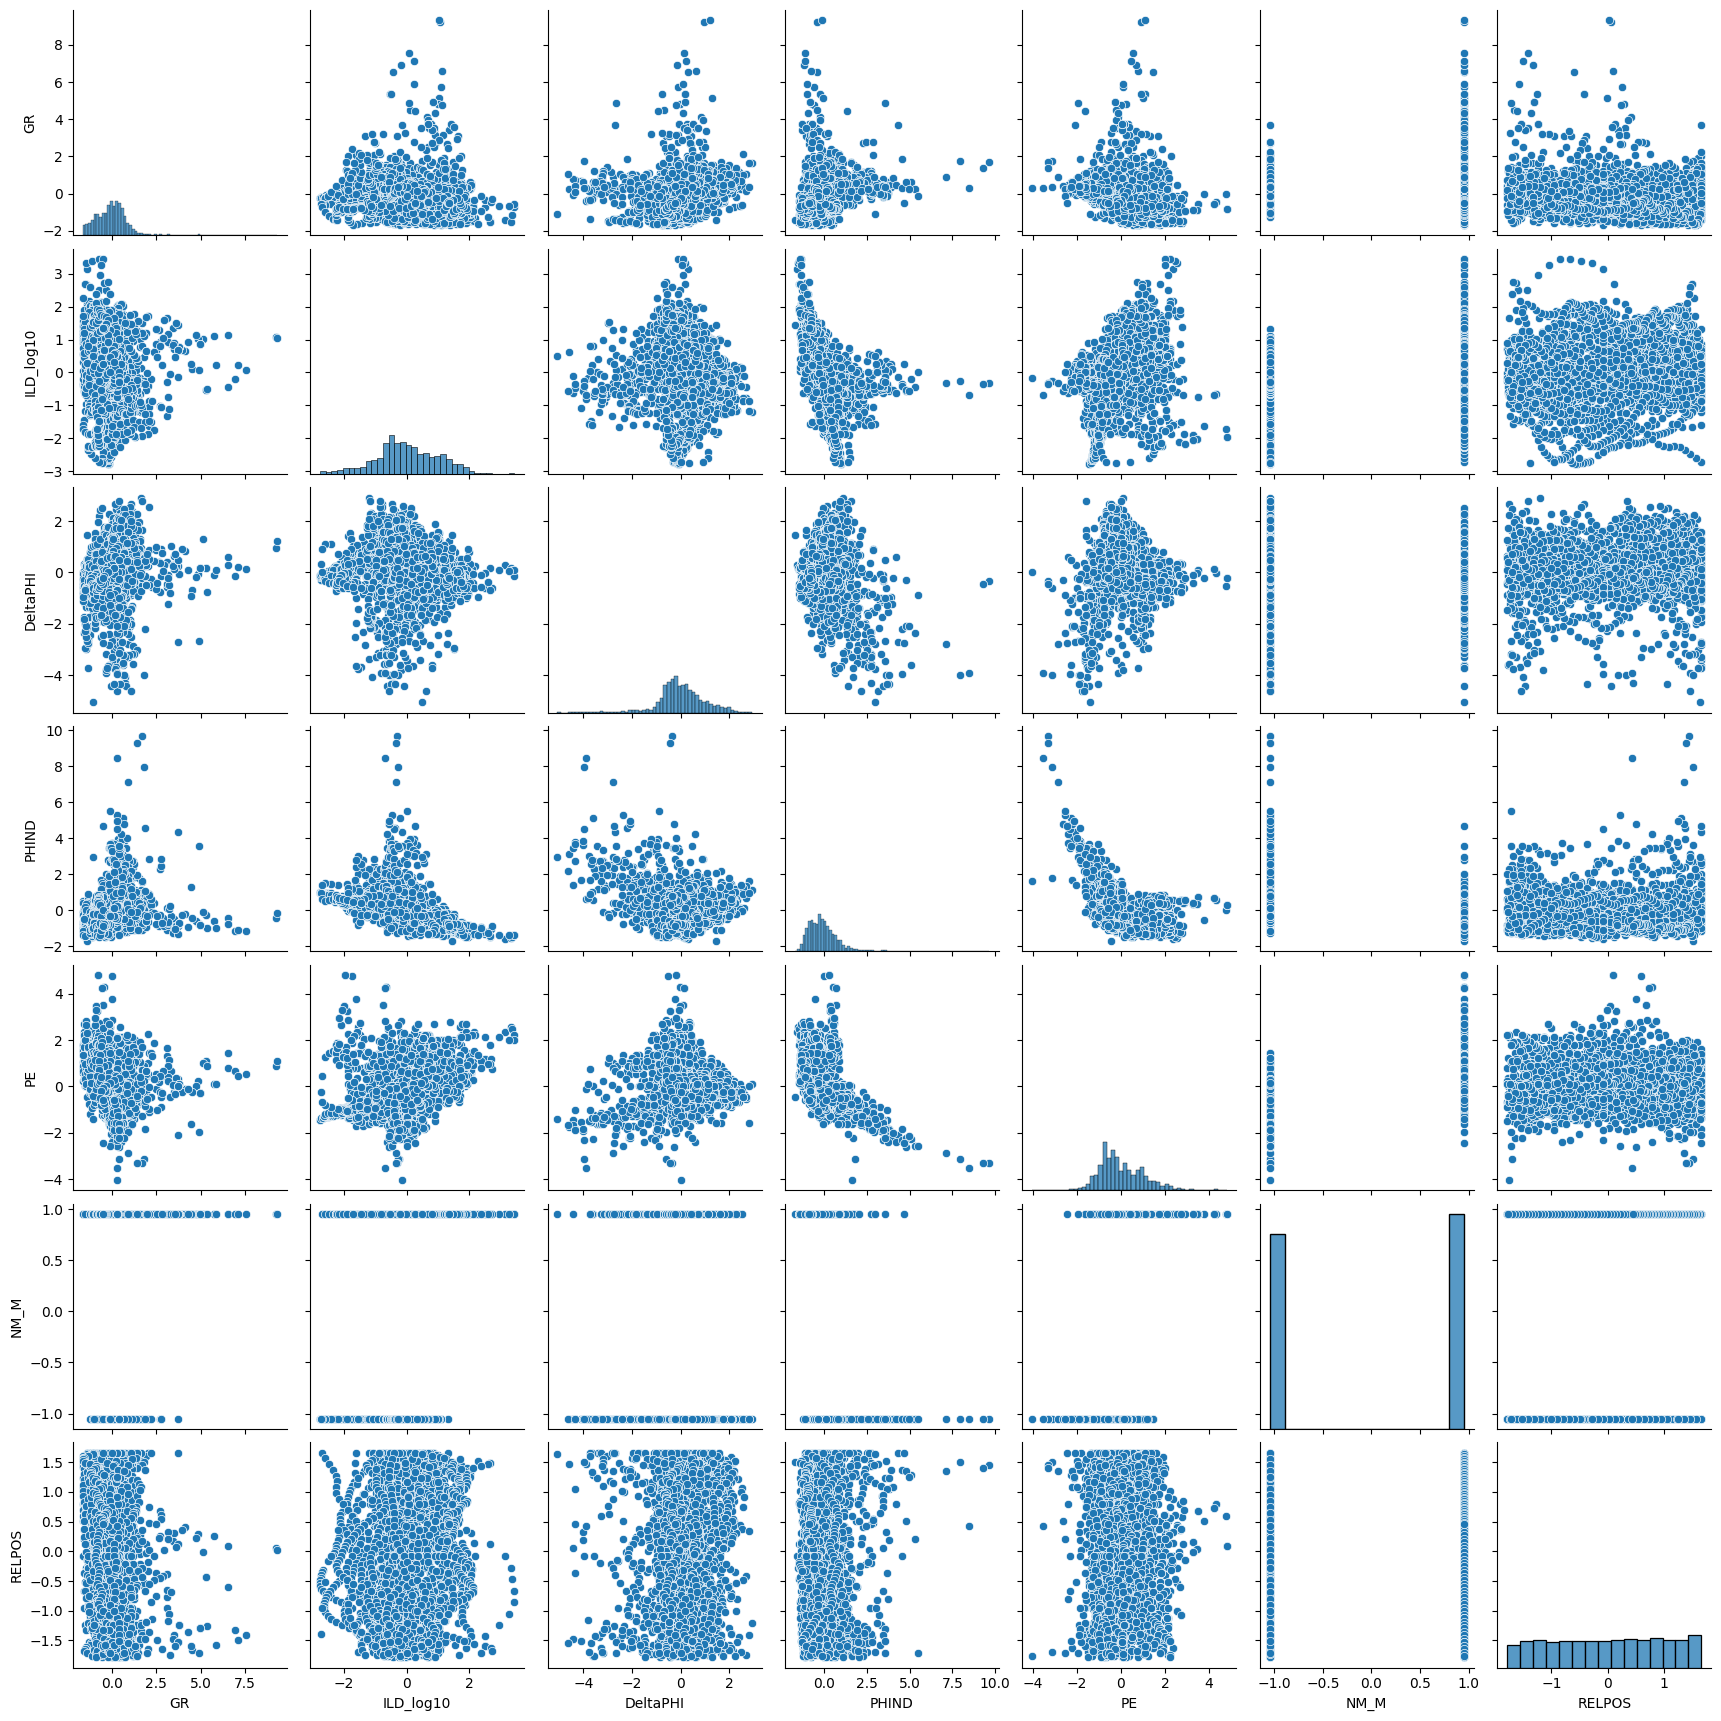

In [63]:
label_df = pd.DataFrame(data = x_scaled, columns = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'])
sns.pairplot(label_df)
plt.savefig('result2.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

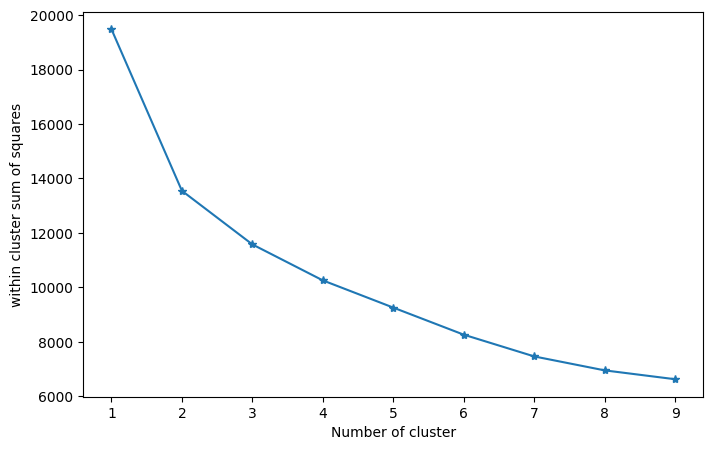

In [64]:
s_sum_value = []
cl_num = 10
for i in range (1, cl_num):
    kmeans = KMeans(i, random_state = 1)
    kmeans.fit(x_scaled)
    s_sum_iter = kmeans.inertia_
    s_sum_value.append(s_sum_iter)
    
number_clusters = range(1, cl_num)
plt.figure(figsize = (8, 5))
plt.plot(number_clusters, s_sum_value, '*-')
plt.xlabel('Number of cluster')
plt.ylabel('within cluster sum of squares')
plt.savefig('result3.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [65]:
n_clusters = 2
km = KMeans(n_clusters= n_clusters, n_init = 10, random_state=1)
km.fit(x_scaled)

KMeans(n_clusters=2, n_init=10, random_state=1)

In [66]:
import collections
collections.Counter(km.labels_)

Counter({1: 1470, 0: 1313})

In [67]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters= 2, n_init = 20, affinity = 'nearest_neighbors', n_neighbors=15,
                             assign_labels = 'discretize', random_state = 1)
sc.fit(x_scaled)

SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   n_clusters=2, n_init=20, n_neighbors=15, random_state=1)

In [68]:
metrics.adjusted_rand_score(km.labels_, sc.labels_)

0.7755584431553714

In [69]:
input_df['facies_km'] = km.labels_
input_df['facies_sc'] = sc.labels_
input_df.head()

Facies     GR  ILD_log10  DeltaPHI   PHIND   PE  NM_M  RELPOS  facies_km  \
0       3  77.45      0.664       9.9  11.915  4.6     1   1.000          1   
1       3  78.26      0.661      14.2  12.565  4.1     1   0.979          1   
2       3  79.05      0.658      14.8  13.050  3.6     1   0.957          1   
3       3  86.10      0.655      13.9  13.115  3.5     1   0.936          1   
4       3  74.58      0.647      13.5  13.300  3.4     1   0.915          1   

   facies_sc  
0          0  
1          0  
2          0  
3          0  
4          0

In [70]:
!pip install mpl_toolkits.axes_grid1

from matplotlib import colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
facies_colors = ['#996633','#ffff00','#000000']

def make_facies_log_plot(data, well_name, label1, label2):
    logs=data.loc[(data['Well Name']==well_name)]
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    #color_dict={0:'red', 1:'blue', 2:'green', 4:'yellow'}
    
    ztop=logs.index.min(); zbot=logs.index.max()
    
    cluster1=np.repeat(np.expand_dims(logs[label1].values,1), 100, 1)
    cluster2=np.repeat(np.expand_dims(logs[label2].values,1), 100, 1)
    #cluster=logs['facies_km']
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(14, 16))
    ax[0].plot(logs.GR, logs.index, '-g', linewidth=3)
    ax[1].plot(logs.ILD_log10, logs.index, '-', linewidth=3)
    ax[2].plot(logs.DeltaPHI, logs.index, '-', linewidth=3, color='0.5')
    ax[3].plot(logs.PHIND, logs.index, '-', linewidth=3, color='r')
    ax[4].plot(logs.PE, logs.index, '-', linewidth=3, color='orange')
    
    im1=ax[5].imshow(cluster1,cmap=cmap_facies, interpolation='none',
                    aspect='auto',vmin=0,vmax=3)
    im2=ax[6].imshow(cluster2,cmap=cmap_facies, interpolation='none',
                    aspect='auto',vmin=0,vmax=3)
    
    divider2 = make_axes_locatable(ax[5])
    cax2 = divider2.append_axes("right", size="20%", pad=0.05)
    
    cbar=plt.colorbar(im2, cax=cax2)
    cbar.set_label((35*' ').join(['0', '1', 
                                '2']),fontsize=16)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid(linewidth=1.2, c='black')
        ax[i].locator_params(axis='x', nbins=3)
        ax[i].tick_params(which='both', labelsize=14)
    
    ax[0].set_xlabel("GR",fontsize=16)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10",fontsize=16)
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI",fontsize=16)
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND",fontsize=16)
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE",fontsize=16)
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('%s'%label1,fontsize=16)
    ax[6].set_xlabel('%s'%label2,fontsize=16)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    #ax[1].set_ylim(np.arange(min(logs.index), max(logs.index), step=200))
    ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%well_name, fontsize=20,y=0.94)

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.axes_grid1 (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.axes_grid1


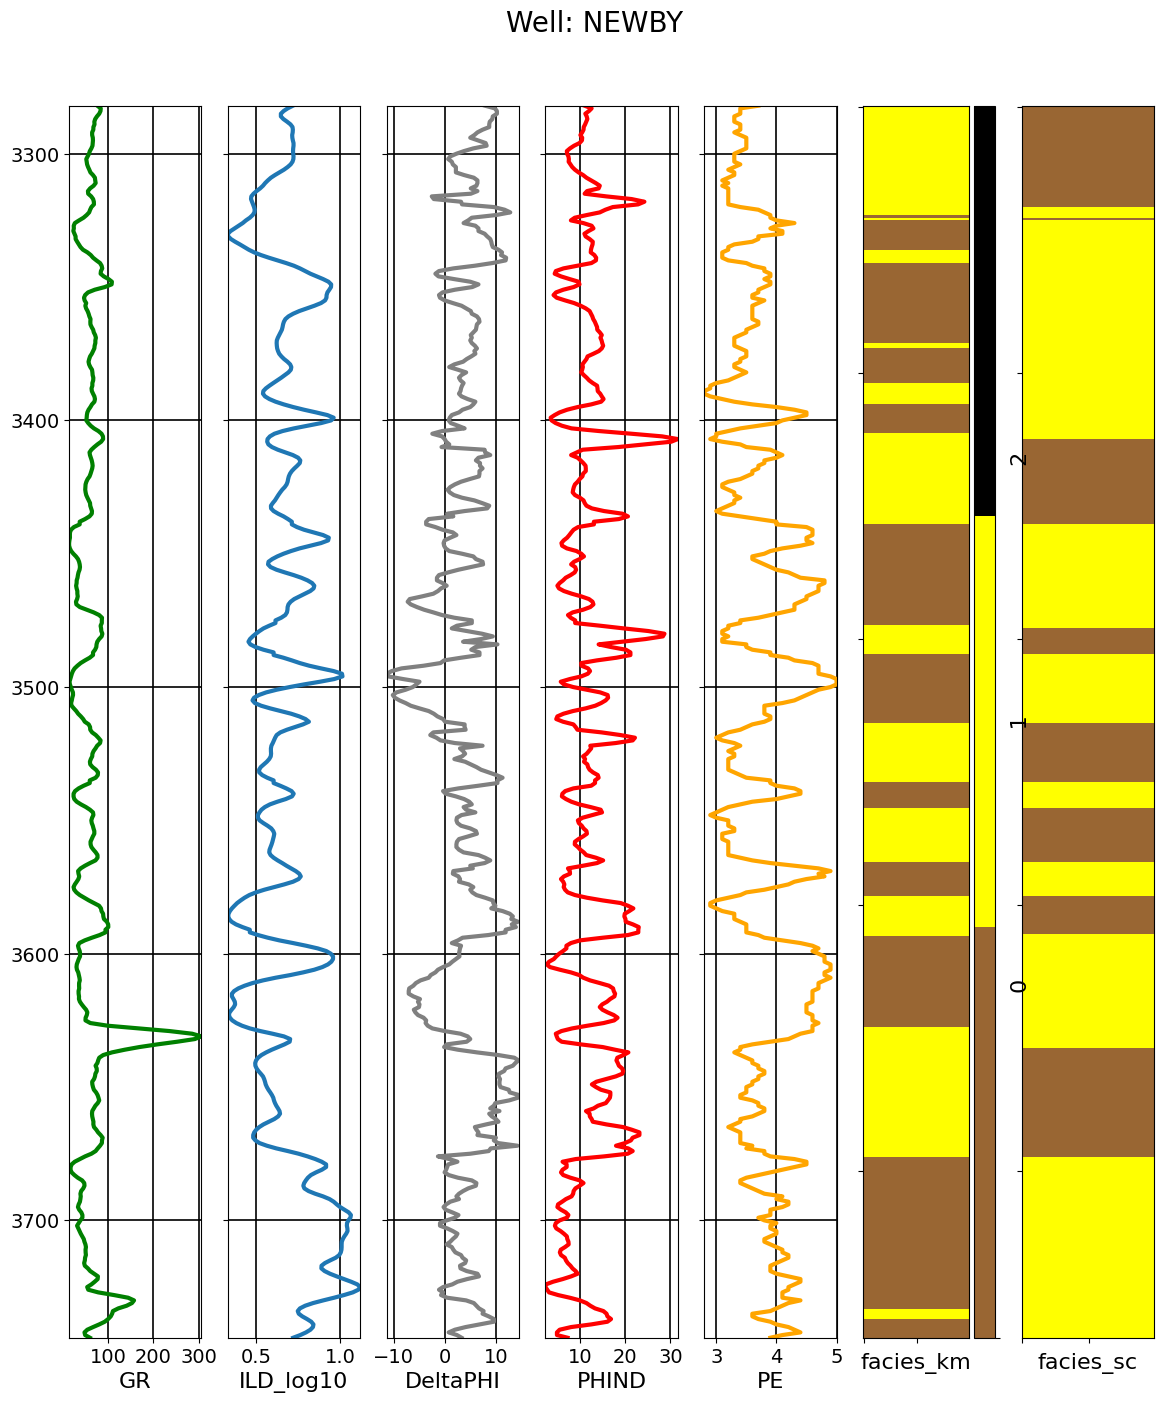

In [71]:
input_df['Well Name'] = well_name
make_facies_log_plot(input_df, 'NEWBY', 'facies_km','facies_sc')
plt.savefig('result5.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

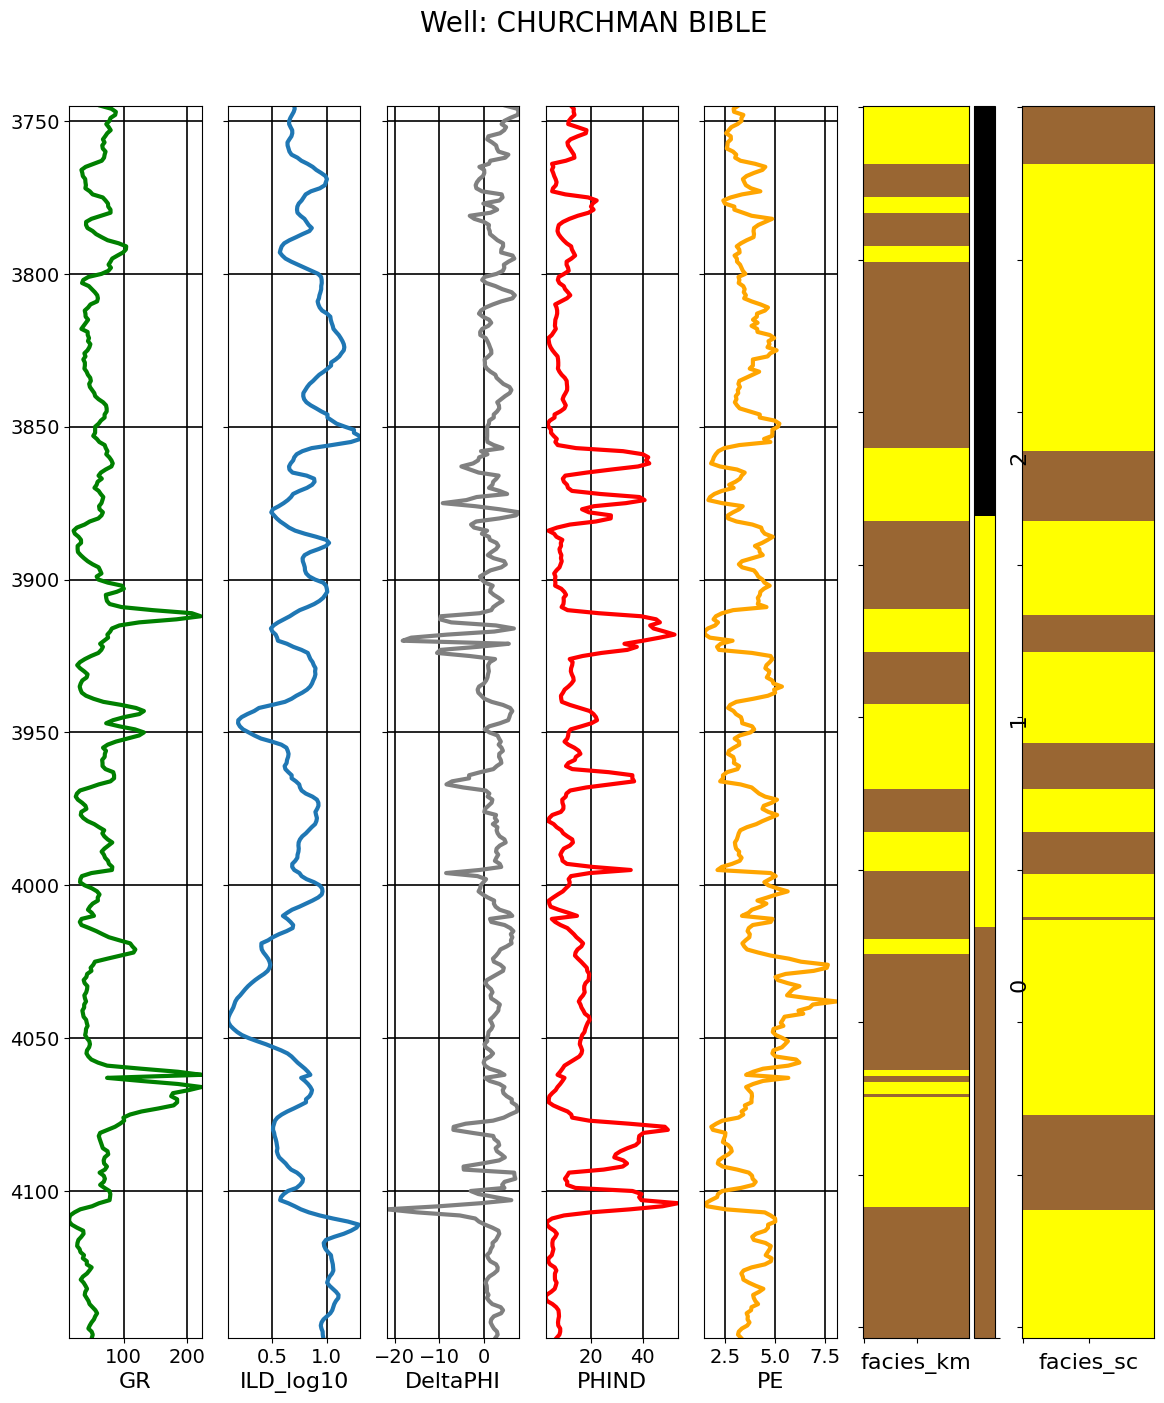

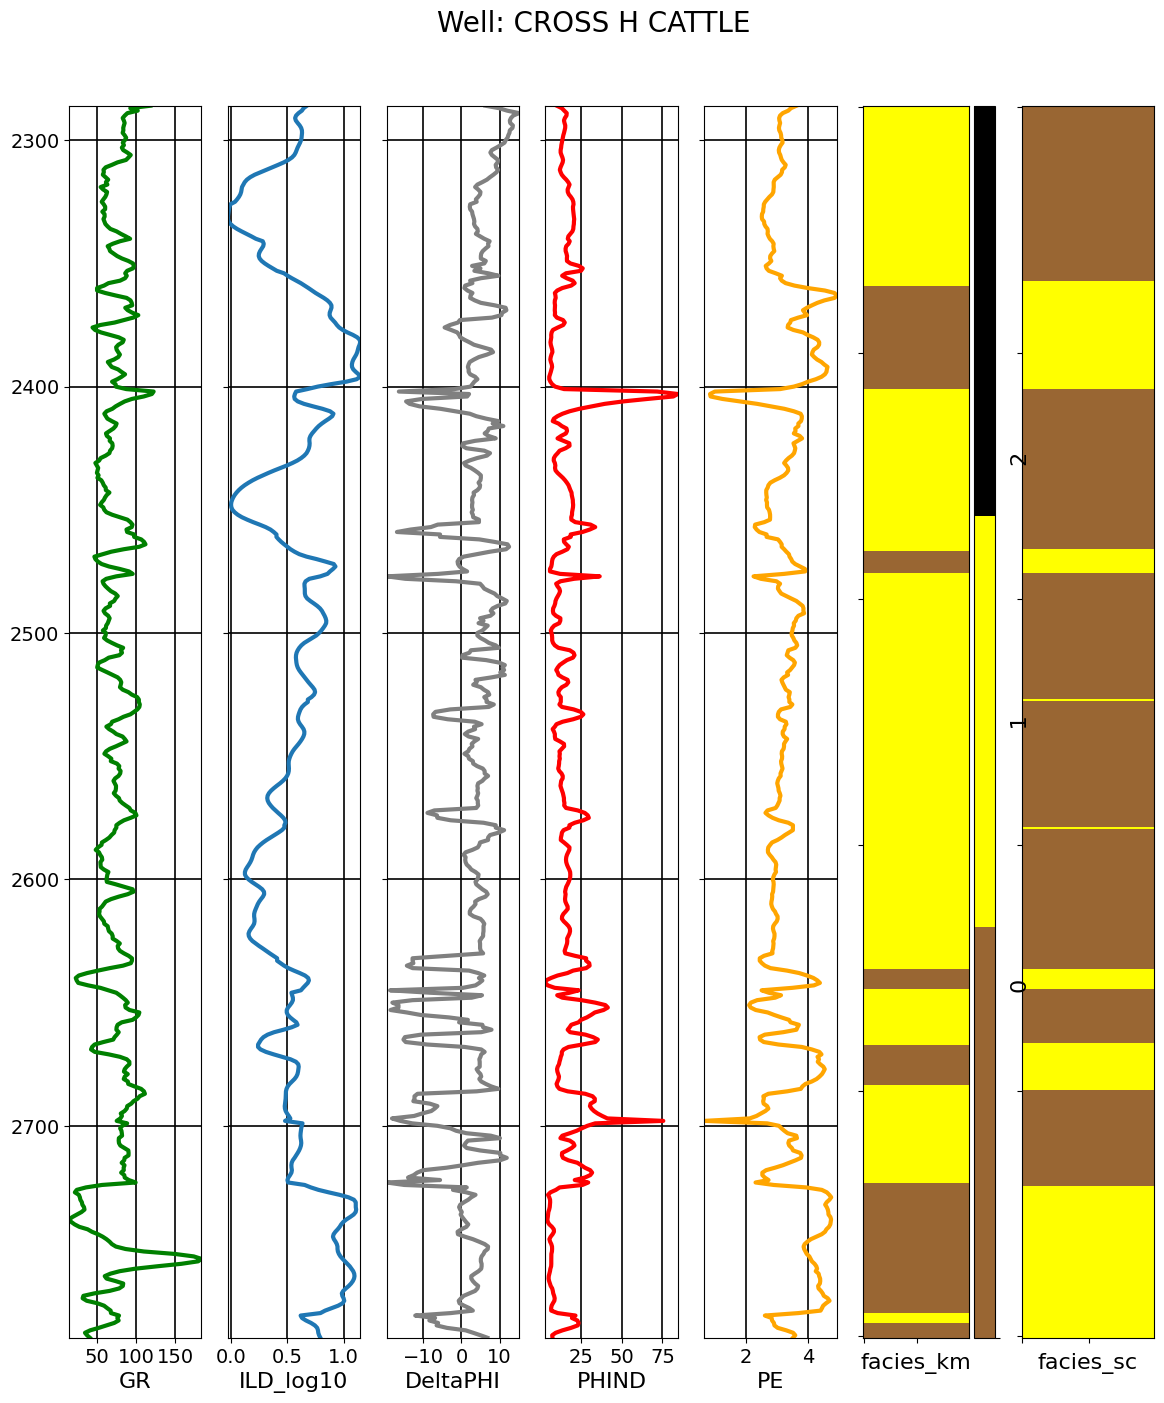

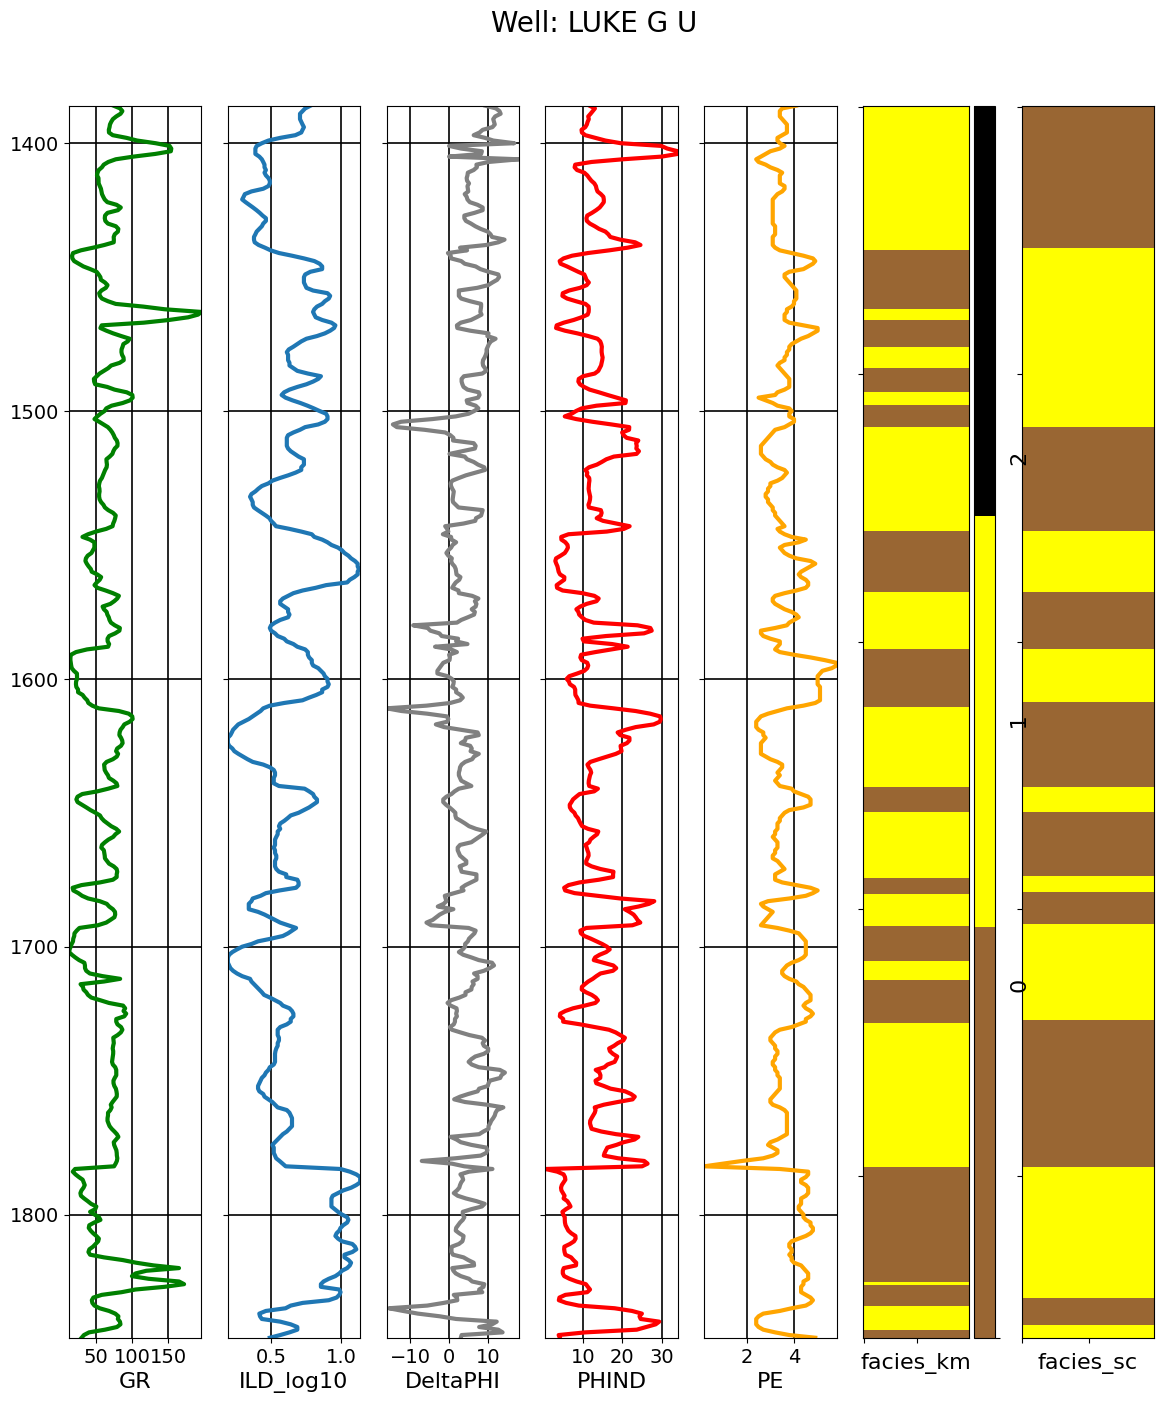

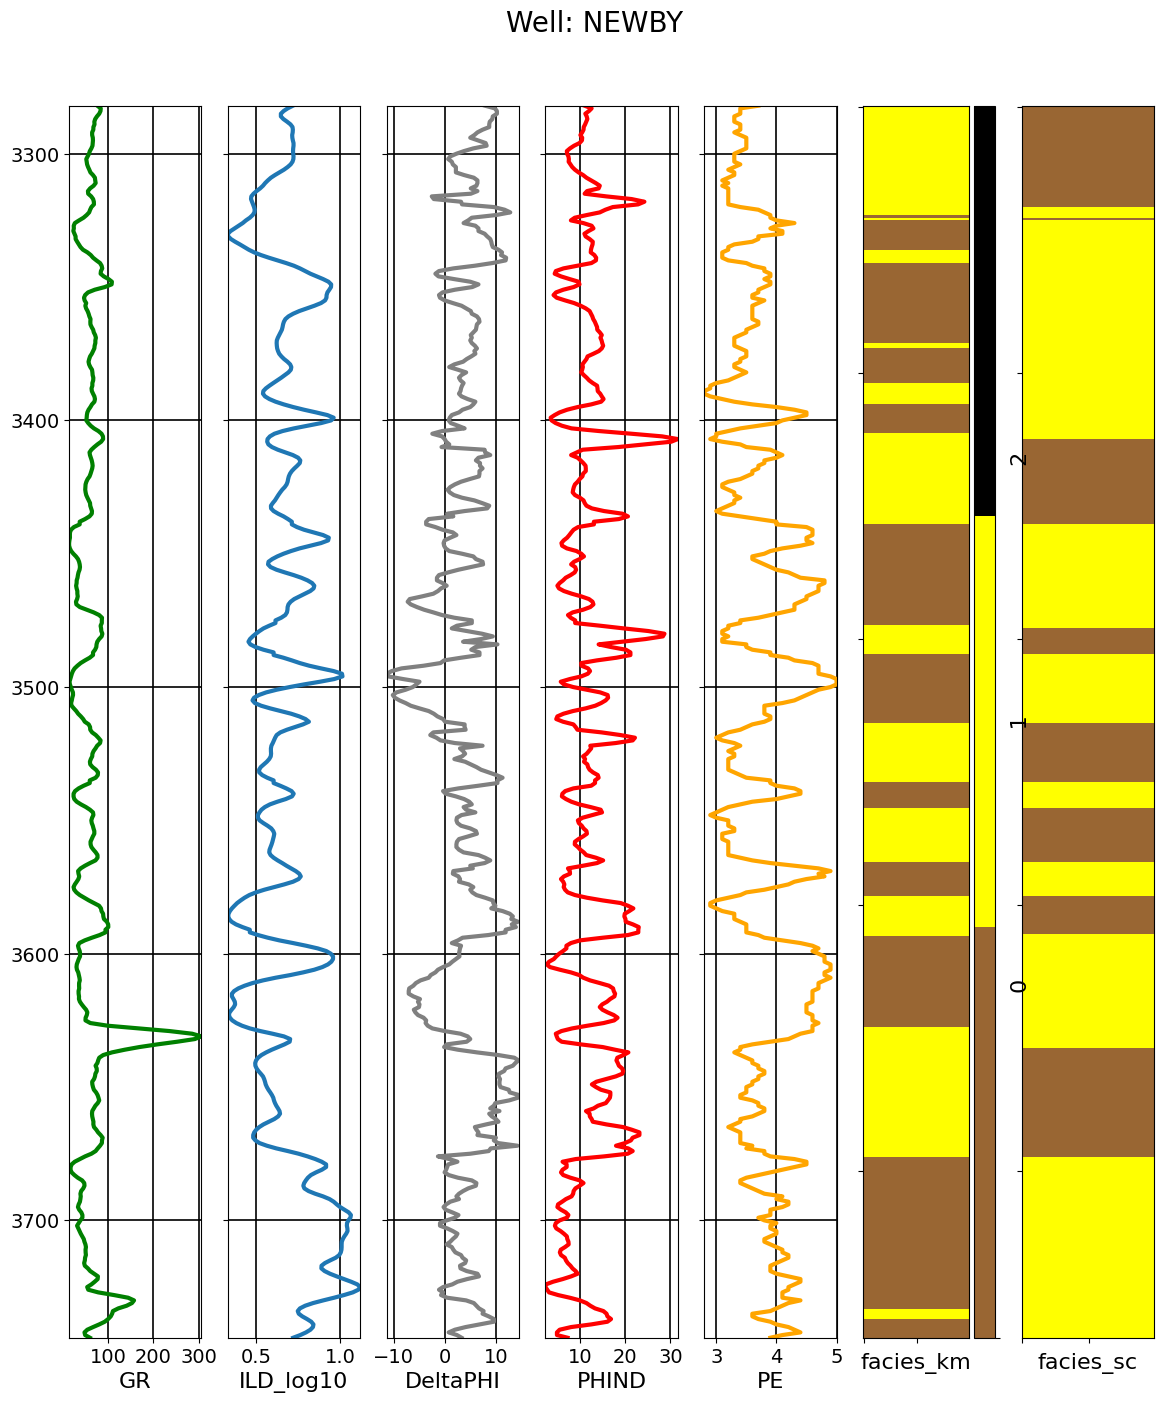

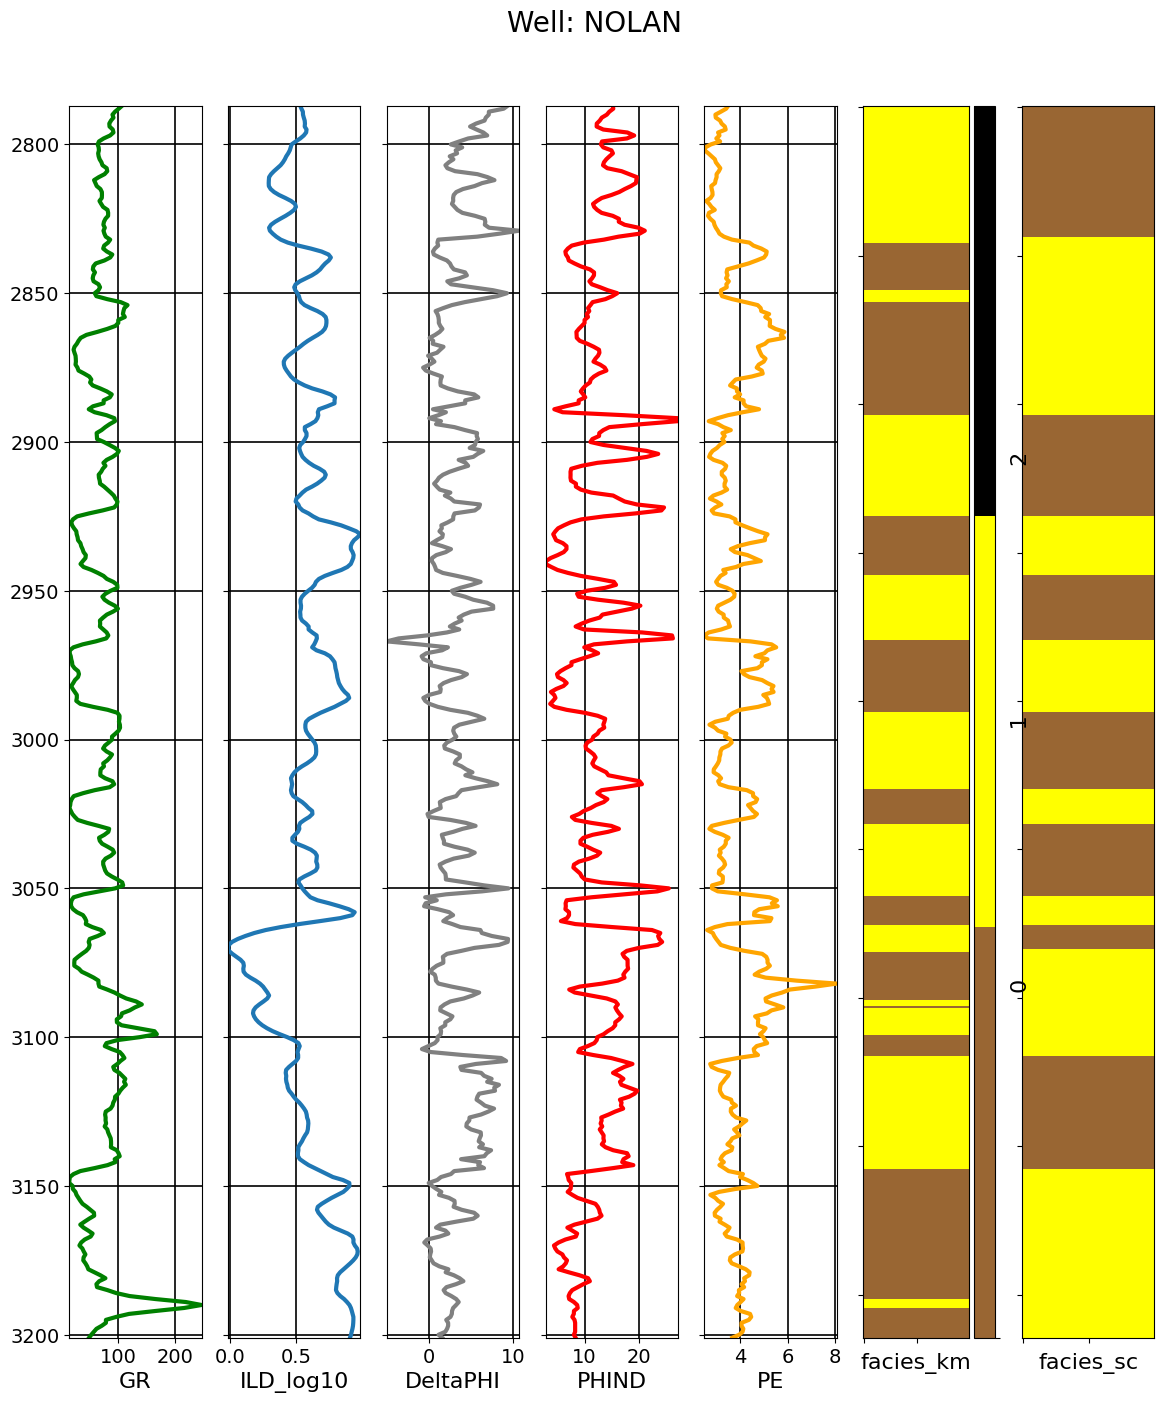

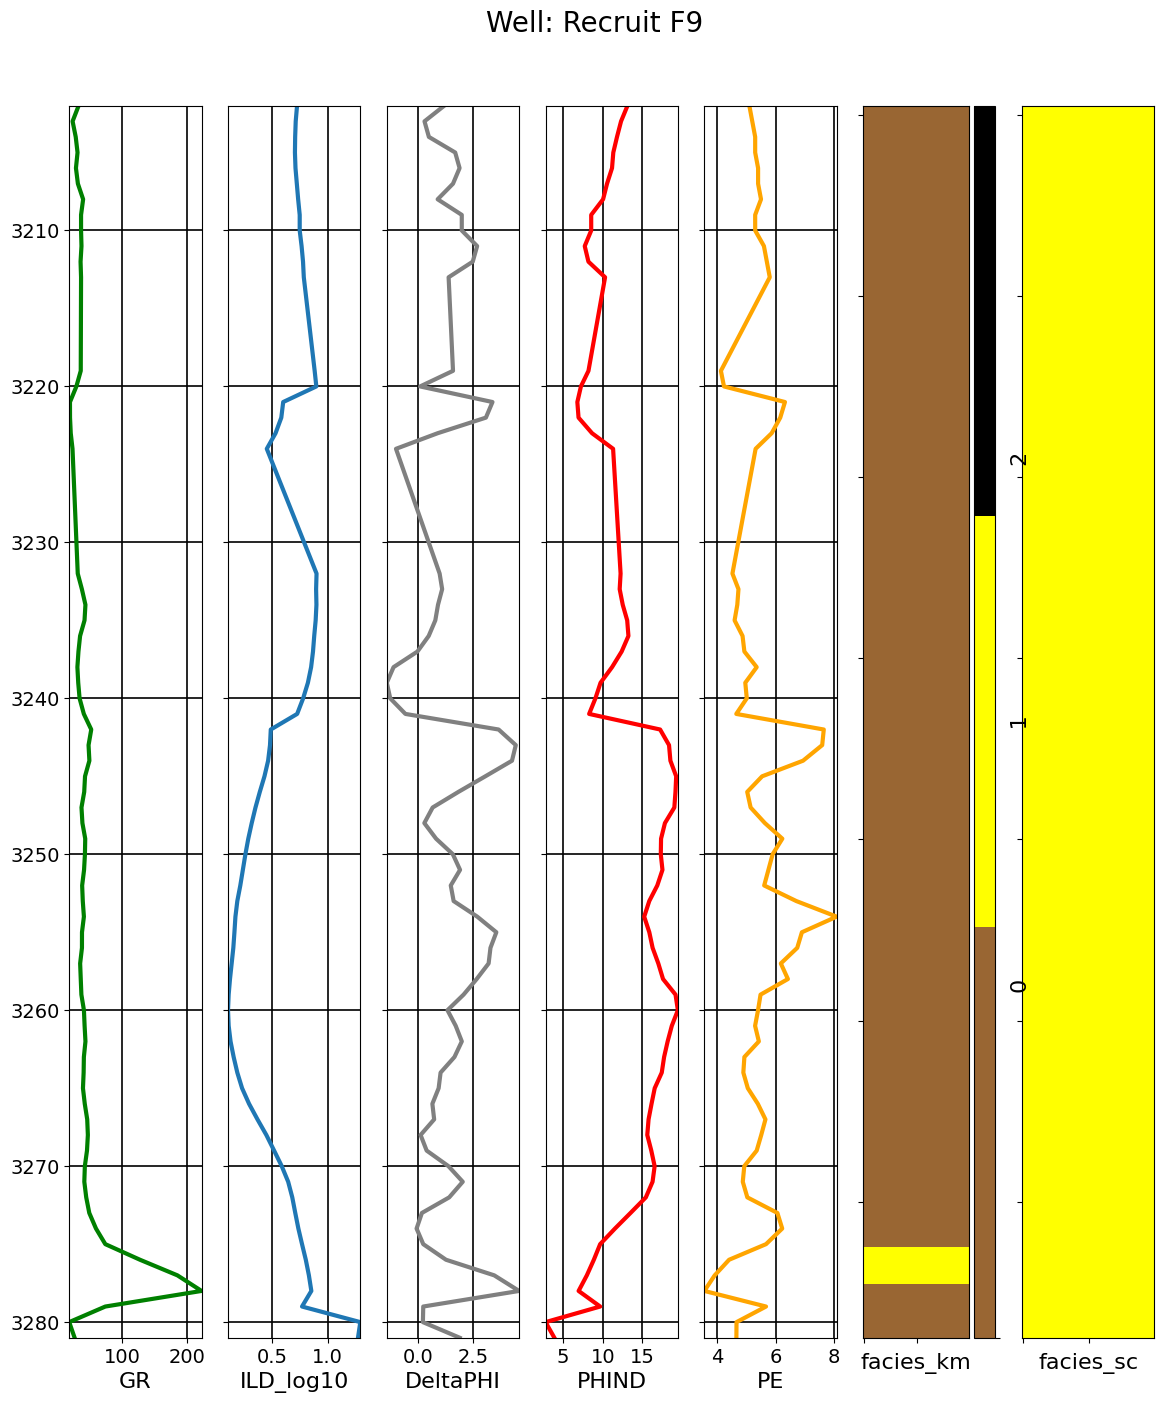

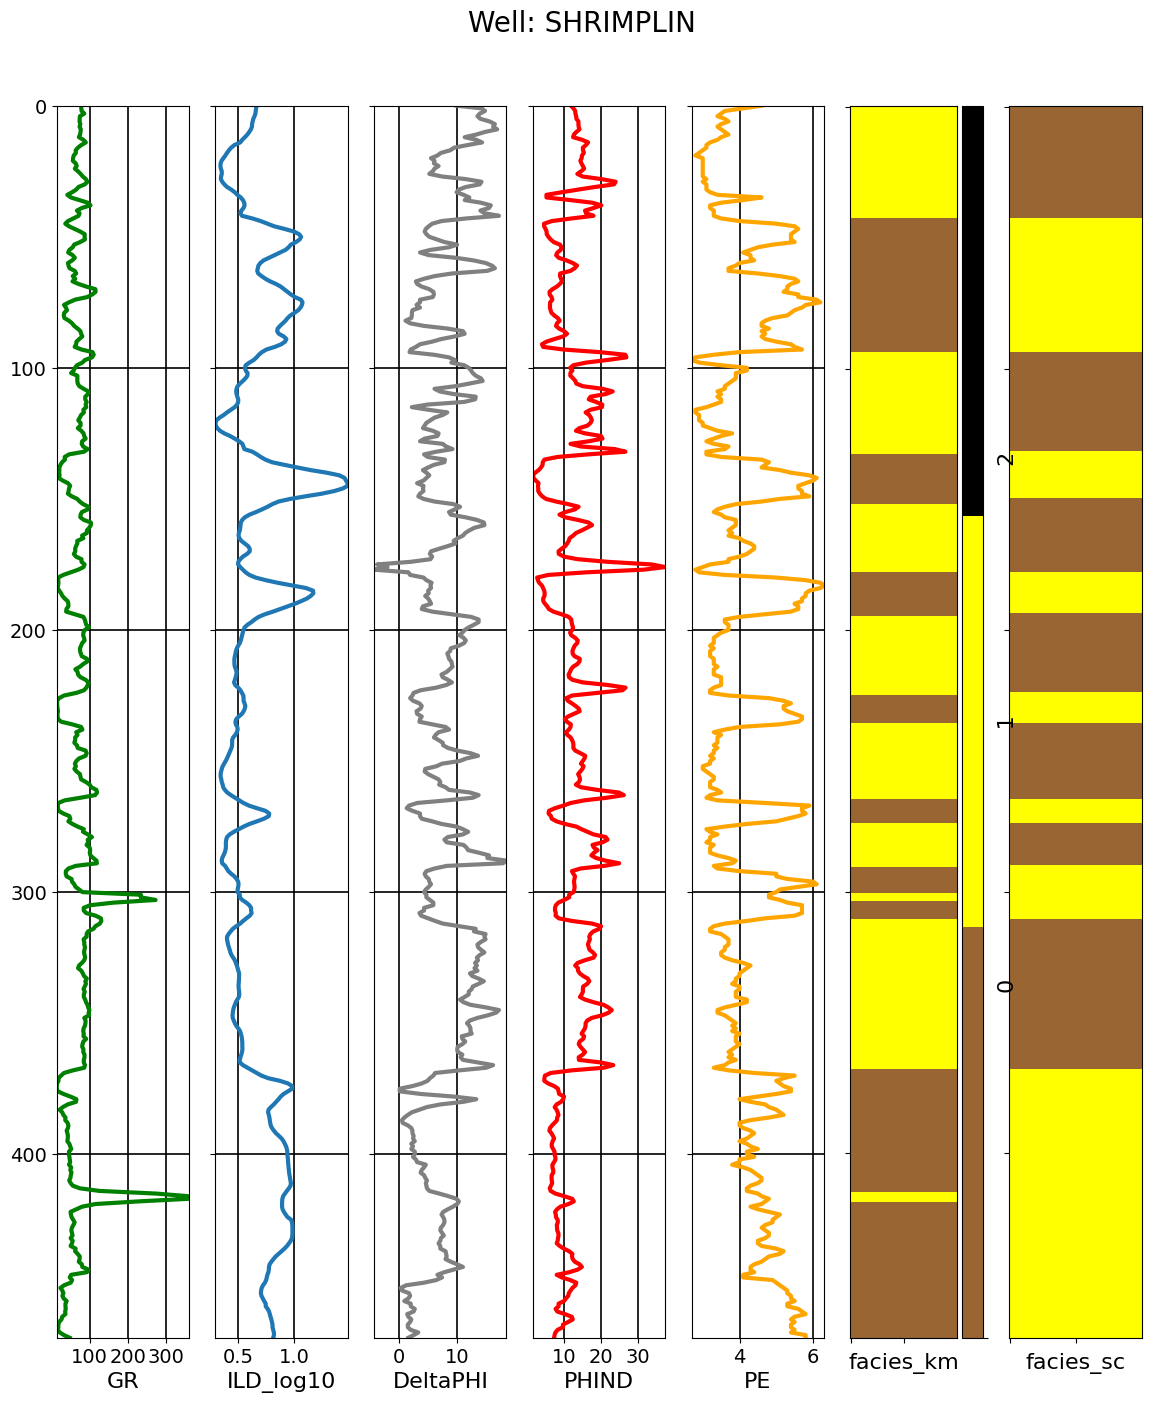

In [72]:
well_list = np.unique(input_df['Well Name'])
for i in well_list:
    make_facies_log_plot(input_df, i, 'facies_km','facies_sc')


# Clustering in shale predicted data

In [73]:
df_shale = input_df.loc[input_df['facies_km']==0]
df_shale.head()

Facies     GR  ILD_log10  DeltaPHI   PHIND   PE  NM_M  RELPOS  facies_km  \
43       8  57.02      0.628      11.6  12.090  3.5     2   1.000          0   
44       8  43.29      0.702       7.3   6.705  4.0     2   0.981          0   
45       8  36.06      0.762       5.7   4.595  5.0     2   0.963          0   
46       8  46.00      0.823       5.1   4.620  5.5     2   0.944          0   
47       6  60.30      0.915       4.6   5.010  5.6     2   0.926          0   

    facies_sc  Well Name  
43          1  SHRIMPLIN  
44          1  SHRIMPLIN  
45          1  SHRIMPLIN  
46          1  SHRIMPLIN  
47          1  SHRIMPLIN

In [74]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
x_scaled1 = scale.fit_transform(df_shale[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']])

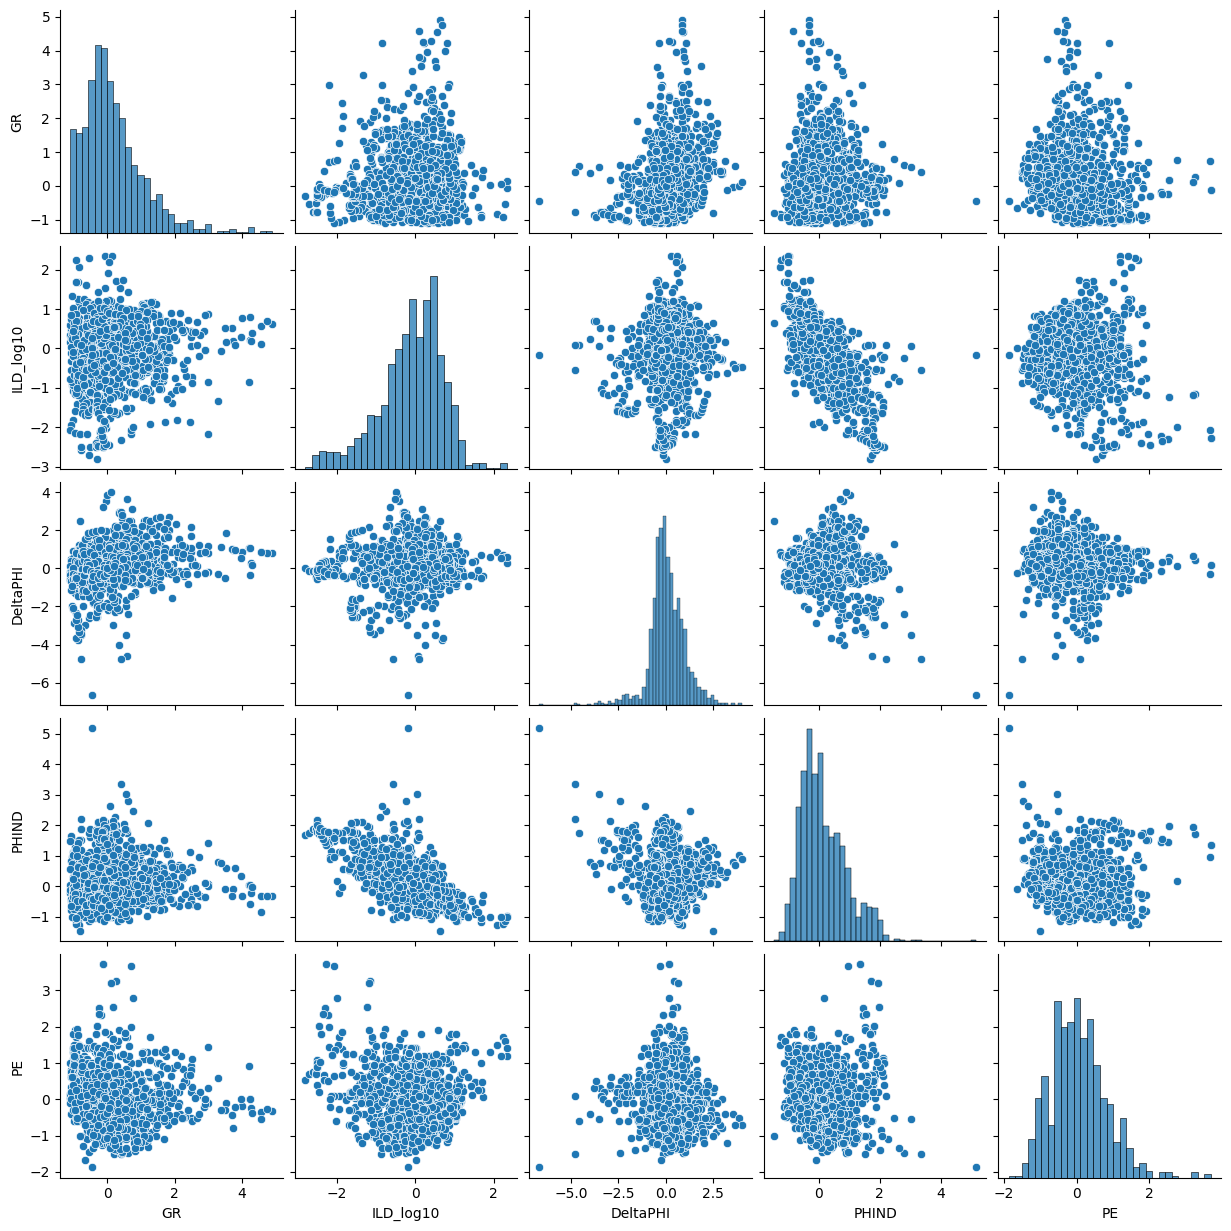

In [75]:
labelled_dataframe = pd.DataFrame(data = x_scaled1, columns = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE'])
sns.pairplot(labelled_dataframe) 
plt.savefig('result6.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

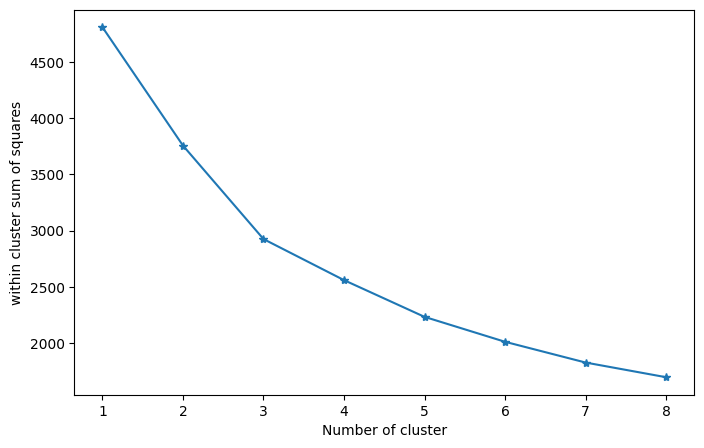

In [76]:
s_sum_value = []
cl_num = 9
for i in range (1, cl_num):
    kmeans = KMeans(i, random_state = 1)
    kmeans.fit(x_scaled1)
    s_sum_iter = kmeans.inertia_
    s_sum_value.append(s_sum_iter)
    
number_clusters = range(1, cl_num)
plt.figure(figsize = (8, 5))
plt.plot(number_clusters, s_sum_value, '*-')
plt.xlabel('Number of cluster')
plt.ylabel('within cluster sum of squares')
plt.savefig('result7.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [77]:
n_clusters = 3
km = KMeans(n_clusters= n_clusters, n_init = 10, random_state=1)
km.fit(x_scaled1)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [78]:
collections.Counter(km.labels_)

Counter({1: 657, 0: 405, 2: 251})

In [79]:
sc = SpectralClustering(n_clusters=3, n_init=20, affinity='nearest_neighbors', n_neighbors=10,
             assign_labels="discretize",
             random_state=0).fit(x_scaled1)

In [80]:
metrics.adjusted_rand_score(km.labels_, sc.labels_)

0.5512805793414559

In [81]:
df_shale['facies_km1']= km.labels_

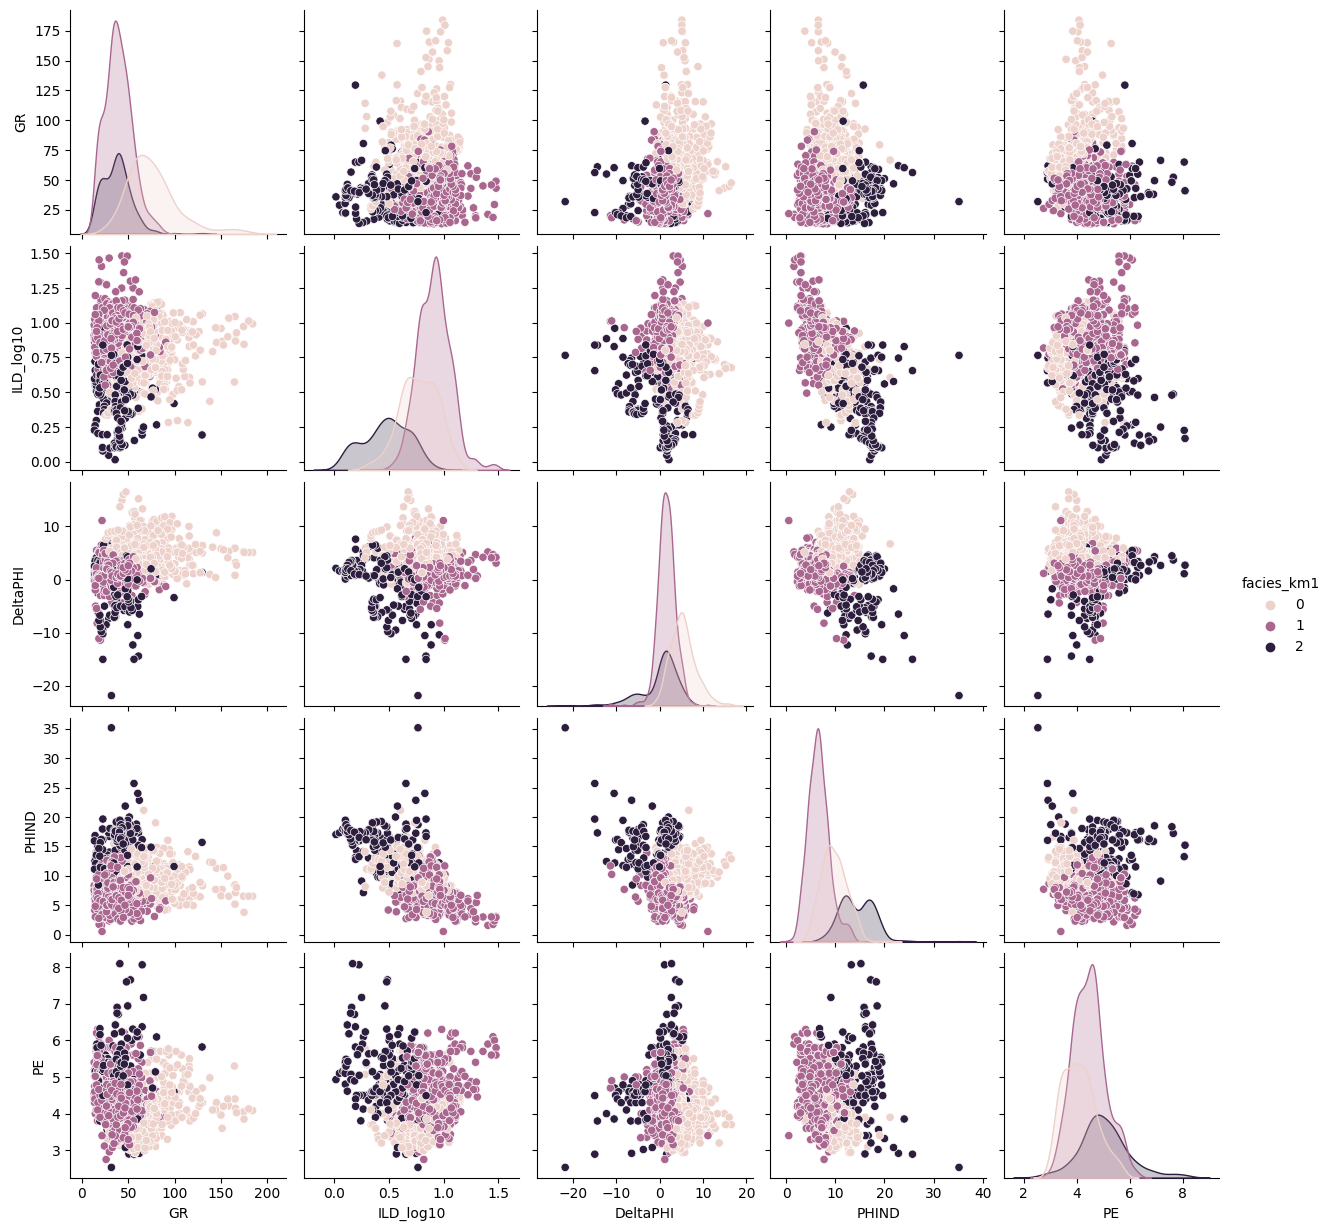

In [82]:
sns.pairplot(df_shale[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'facies_km1']], hue = 'facies_km1')
plt.savefig('result8.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [83]:
df_shale['facies_km1'].loc[df_shale['facies_km1']==0]= 3
df_shale['facies_km1'].loc[df_shale['facies_km1']==1]= 4
df_shale['facies_km1'].loc[df_shale['facies_km1']==2]= 5

In [84]:
df_shale.drop(['facies_km', 'facies_sc'], axis = 1, inplace= True)

In [85]:
input_df['facies_km'].loc[input_df['facies_km']==0] = df_shale['facies_km1']
input_df['facies_km'].unique()

array([1, 3, 4, 5], dtype=int32)

In [86]:
input_df.head()

Facies     GR  ILD_log10  DeltaPHI   PHIND   PE  NM_M  RELPOS  facies_km  \
0       3  77.45      0.664       9.9  11.915  4.6     1   1.000          1   
1       3  78.26      0.661      14.2  12.565  4.1     1   0.979          1   
2       3  79.05      0.658      14.8  13.050  3.6     1   0.957          1   
3       3  86.10      0.655      13.9  13.115  3.5     1   0.936          1   
4       3  74.58      0.647      13.5  13.300  3.4     1   0.915          1   

   facies_sc  Well Name  
0          0  SHRIMPLIN  
1          0  SHRIMPLIN  
2          0  SHRIMPLIN  
3          0  SHRIMPLIN  
4          0  SHRIMPLIN

# clustering in non-shale facies

In [87]:
df_nshale = input_df.loc[input_df['facies_km']==1]
df_nshale.head()

Facies     GR  ILD_log10  DeltaPHI   PHIND   PE  NM_M  RELPOS  facies_km  \
0       3  77.45      0.664       9.9  11.915  4.6     1   1.000          1   
1       3  78.26      0.661      14.2  12.565  4.1     1   0.979          1   
2       3  79.05      0.658      14.8  13.050  3.6     1   0.957          1   
3       3  86.10      0.655      13.9  13.115  3.5     1   0.936          1   
4       3  74.58      0.647      13.5  13.300  3.4     1   0.915          1   

   facies_sc  Well Name  
0          0  SHRIMPLIN  
1          0  SHRIMPLIN  
2          0  SHRIMPLIN  
3          0  SHRIMPLIN  
4          0  SHRIMPLIN

In [88]:
x_scaled2 = scale.fit_transform(df_nshale[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']])

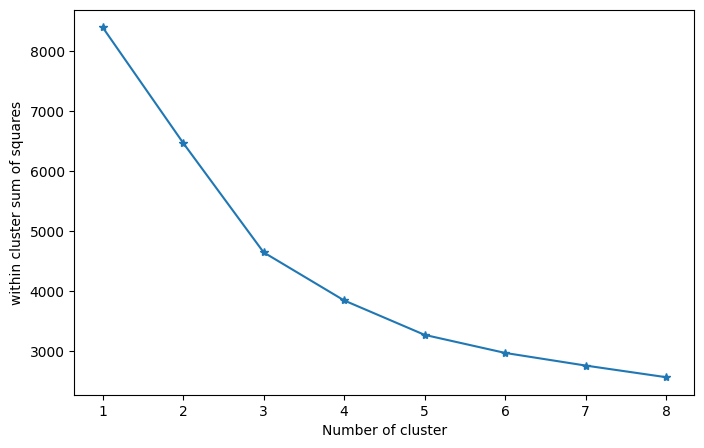

In [89]:
s_sum_value = []
cl_num = 9
for i in range (1, cl_num):
    kmeans = KMeans(i, random_state = 1)
    kmeans.fit(x_scaled2)
    s_sum_iter = kmeans.inertia_
    s_sum_value.append(s_sum_iter)
    
number_clusters = range(1, cl_num)
plt.figure(figsize = (8, 5))
plt.plot(number_clusters, s_sum_value, '*-')
plt.xlabel('Number of cluster')
plt.ylabel('within cluster sum of squares')
plt.savefig('result9.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [90]:
n_clusters = 3
km = KMeans(n_clusters= n_clusters, n_init = 10, random_state=1)
km.fit(x_scaled2)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [91]:
collections.Counter(km.labels_)

Counter({1: 1258, 2: 172, 0: 40})

In [92]:
sc = SpectralClustering(n_clusters=3, n_init=20, affinity='nearest_neighbors', n_neighbors=10,
             assign_labels="discretize",
             random_state=0).fit(x_scaled2)

In [93]:
metrics.adjusted_rand_score(km.labels_, sc.labels_)

0.06946334605405403

In [94]:
df_nshale['facies_km1']= km.labels_

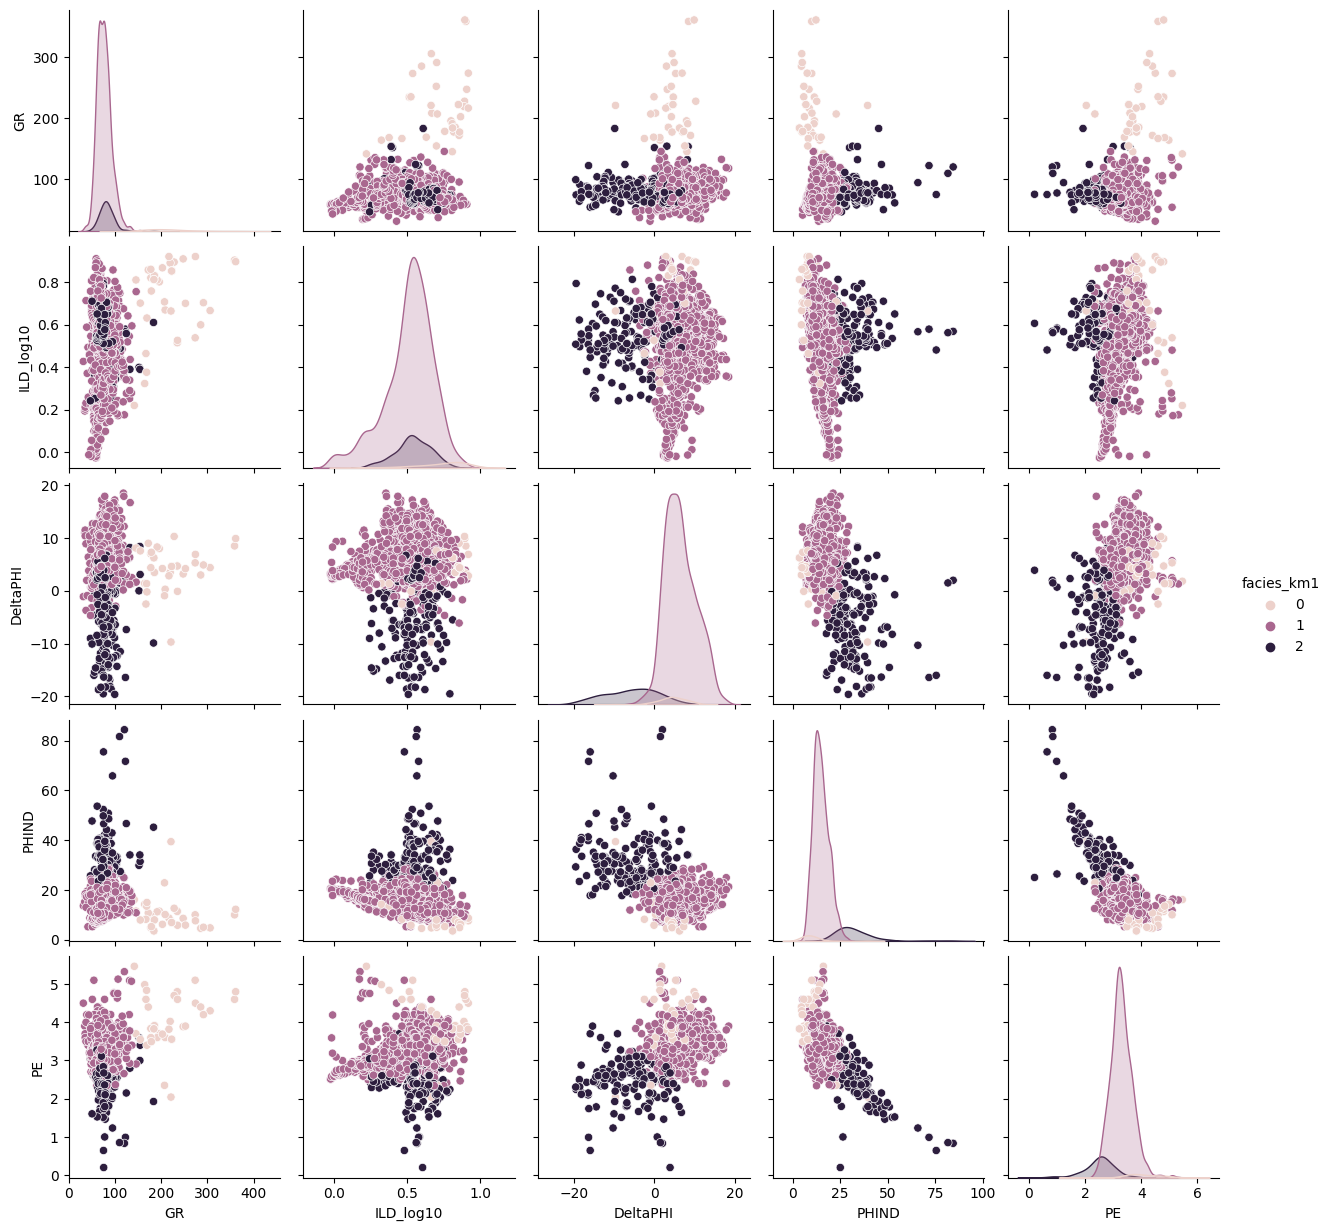

In [95]:
sns.pairplot(df_nshale[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'facies_km1']], hue = 'facies_km1')
plt.savefig('result10.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [96]:
df_nshale['facies_km1'].loc[df_nshale['facies_km1']==0]= 6
df_nshale['facies_km1'].loc[df_nshale['facies_km1']==1]= 7
df_nshale['facies_km1'].loc[df_nshale['facies_km1']==2]= 8

In [97]:
df_nshale.drop(['facies_km', 'facies_sc'], axis = 1, inplace= True)

In [98]:
input_df['facies_km'].loc[input_df['facies_km']==1] = df_nshale['facies_km1']
input_df['facies_km'].unique()

array([7, 3, 4, 8, 5, 6], dtype=int32)

In [99]:
from matplotlib import colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
facies_colors = ['#ffff00','#000000','#999966','#996633','#cc9900', 'blue', 'Green', 'red']

def make_facies_log_plot(data, well_name, label1):
    logs=data.loc[(data['Well Name']==well_name)]
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    #color_dict={0:'red', 1:'blue', 2:'green', 4:'yellow'}
    
    ztop=logs.index.min(); zbot=logs.index.max()
    
    cluster1=np.repeat(np.expand_dims(logs[label1].values,1), 100, 1)
    
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(14, 16))
    ax[0].plot(logs.GR, logs.index, '-g', linewidth=3)
    ax[1].plot(logs.ILD_log10, logs.index, '-', linewidth=3)
    ax[2].plot(logs.DeltaPHI, logs.index, '-', linewidth=3, color='0.5')
    ax[3].plot(logs.PHIND, logs.index, '-', linewidth=3, color='r')
    ax[4].plot(logs.PE, logs.index, '-', linewidth=3, color='orange')
    
    im1=ax[5].imshow(cluster1,cmap=cmap_facies, interpolation='none',
                    aspect='auto',vmin=0,vmax=6)
    
    
    divider1 = make_axes_locatable(ax[5])
    cax1 = divider1.append_axes("right", size="20%", pad=0.05)
   
    
    cbar=plt.colorbar(im1, cax=cax1)
    cbar.set_label((35*' ').join(['0', '2', '3', '4', '5']),fontsize=16)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        #ax[i].set_ylim(10000,15500)
        ax[i].invert_yaxis()
        ax[i].grid(linewidth=1.2, c='black')
        ax[i].locator_params(axis='x', nbins=3)
        ax[i].tick_params(which='both', labelsize=14)
    
    ax[0].set_xlabel("GR",fontsize=16)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10",fontsize=16)
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI",fontsize=16)
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND",fontsize=16)
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE",fontsize=16)
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('%s'%label1,fontsize=16)
    
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    #ax[1].set_ylim(np.arange(min(logs.index), max(logs.index), step=200))
    ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    
    f.suptitle('Well: %s'%well_name, fontsize=20,y=0.94)

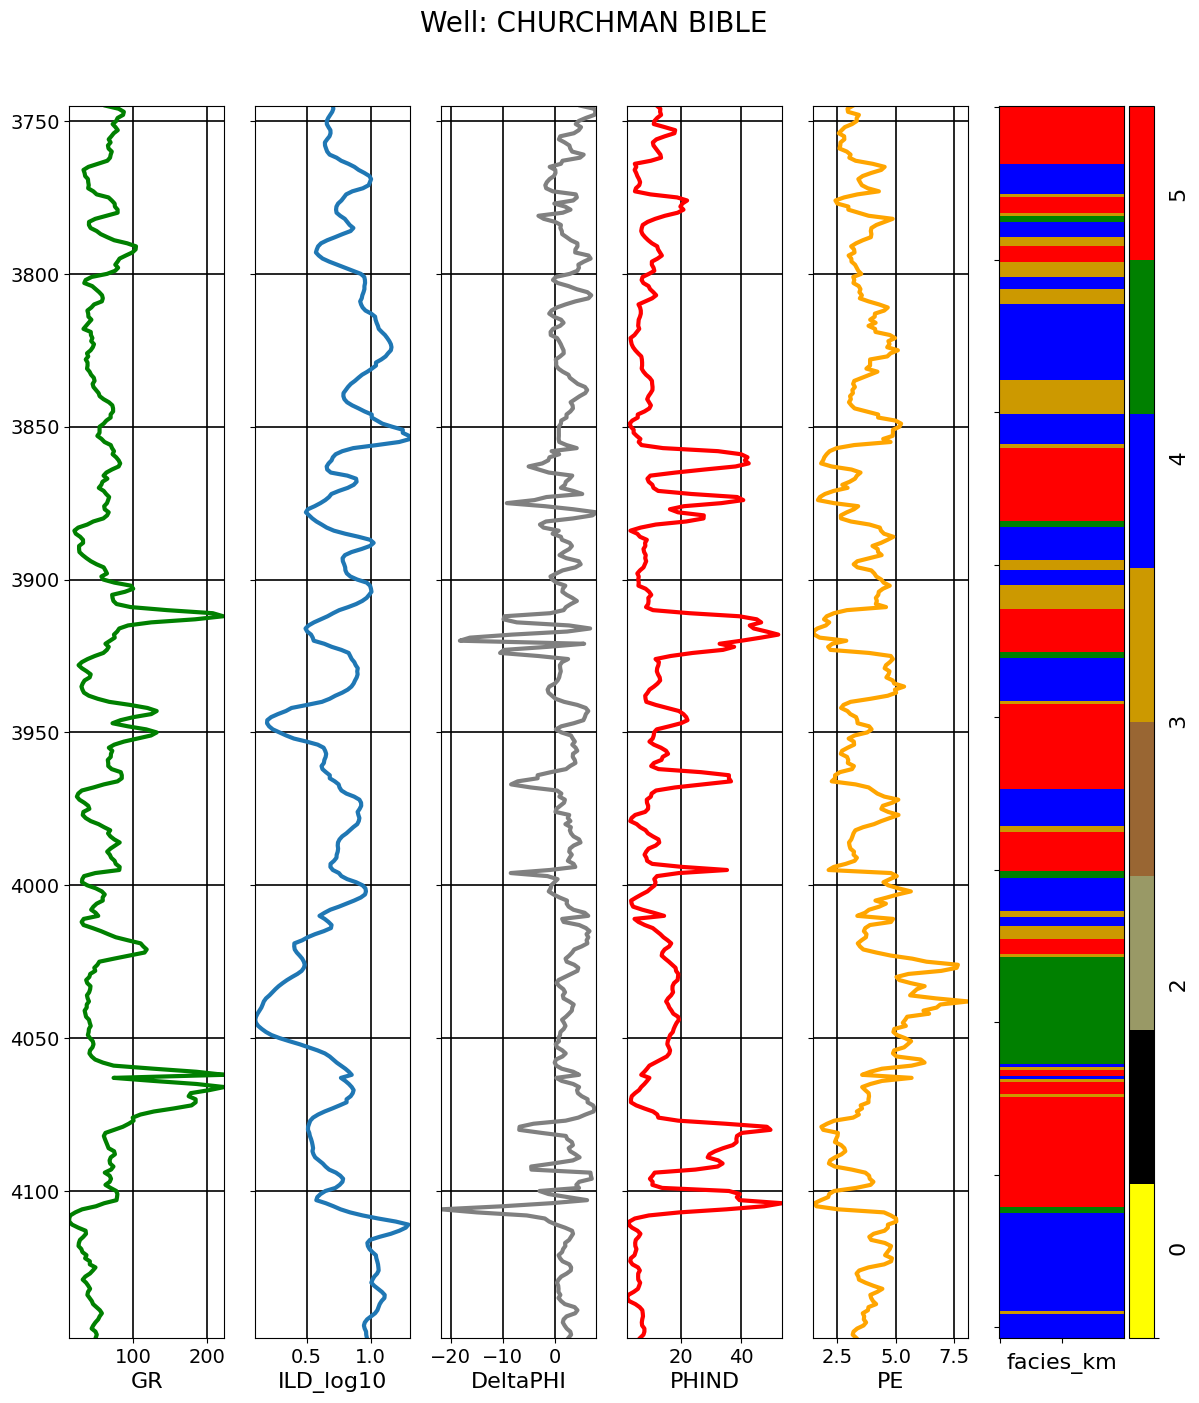

In [100]:
well_list = np.unique(input_df['Well Name'])
make_facies_log_plot(input_df, 'CHURCHMAN BIBLE', 'facies_km')
plt.savefig('result11.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

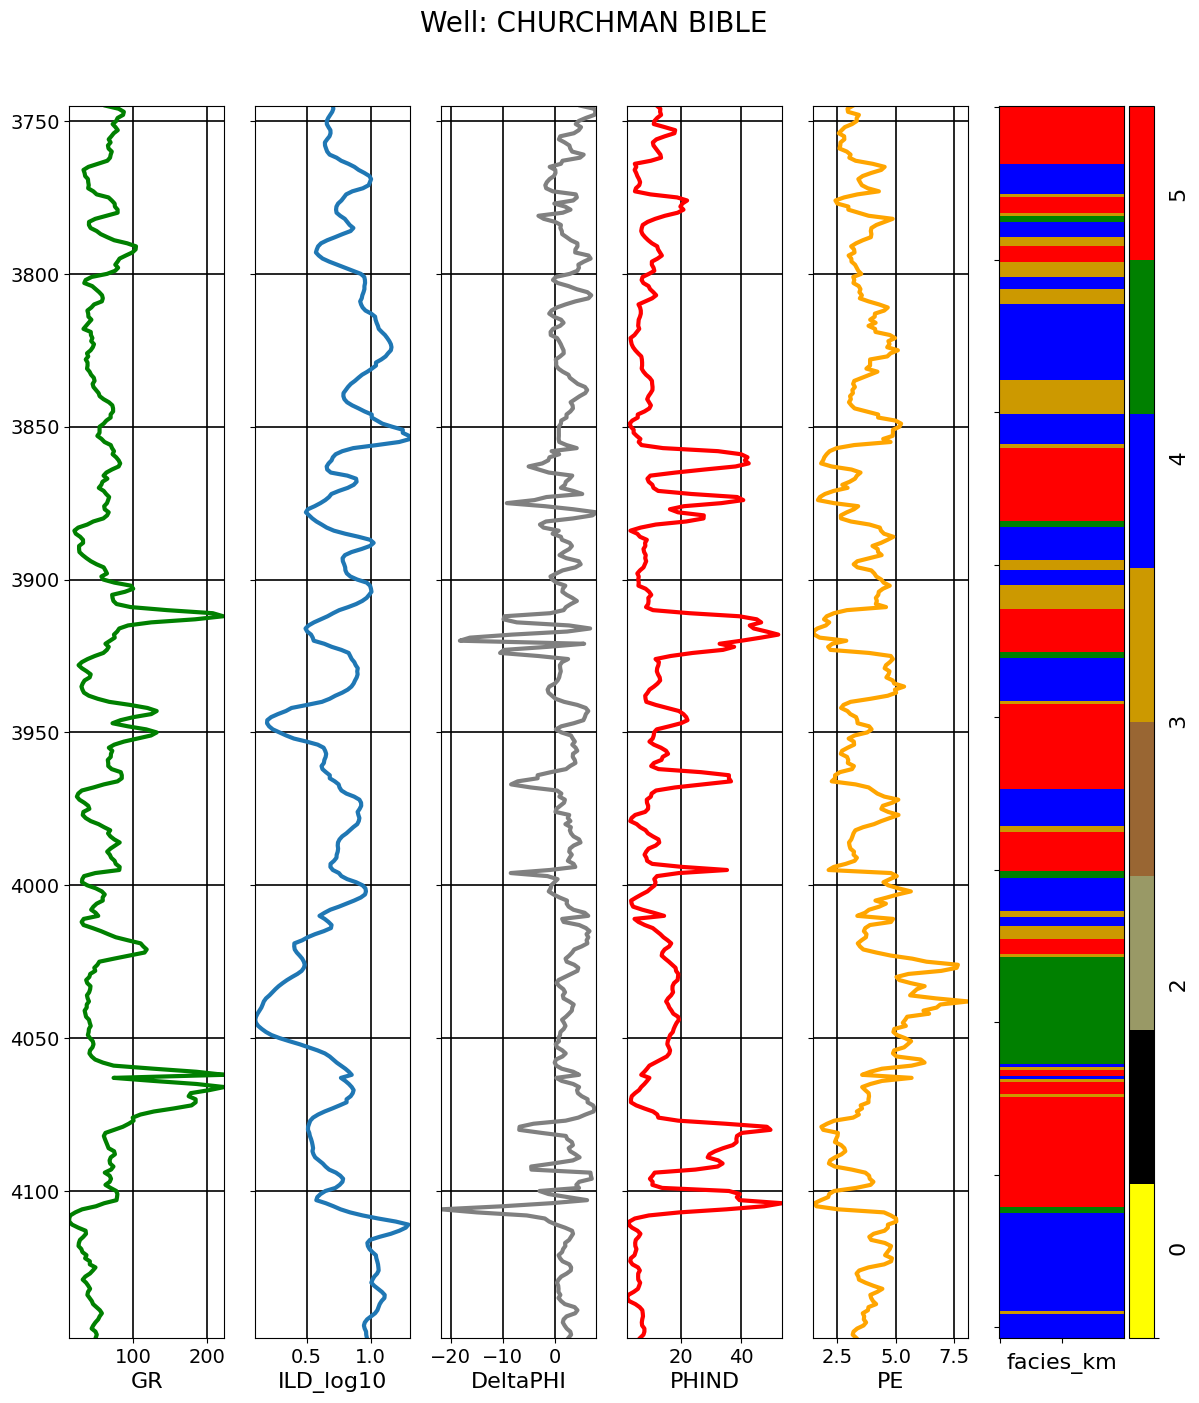

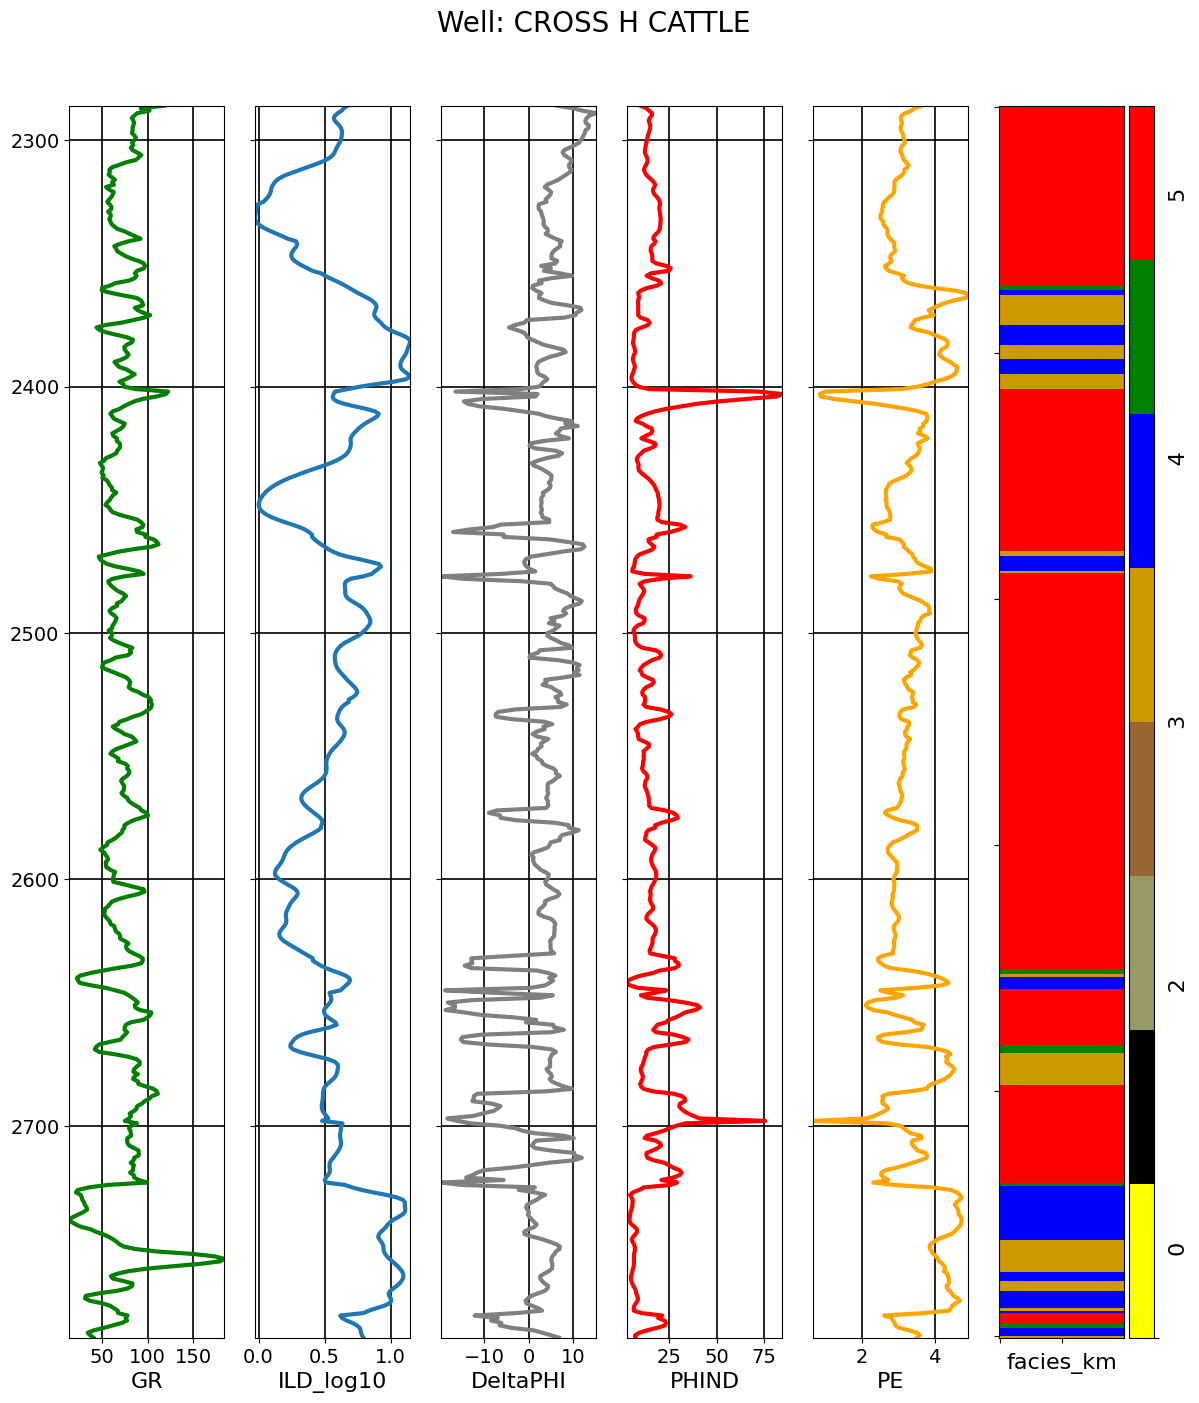

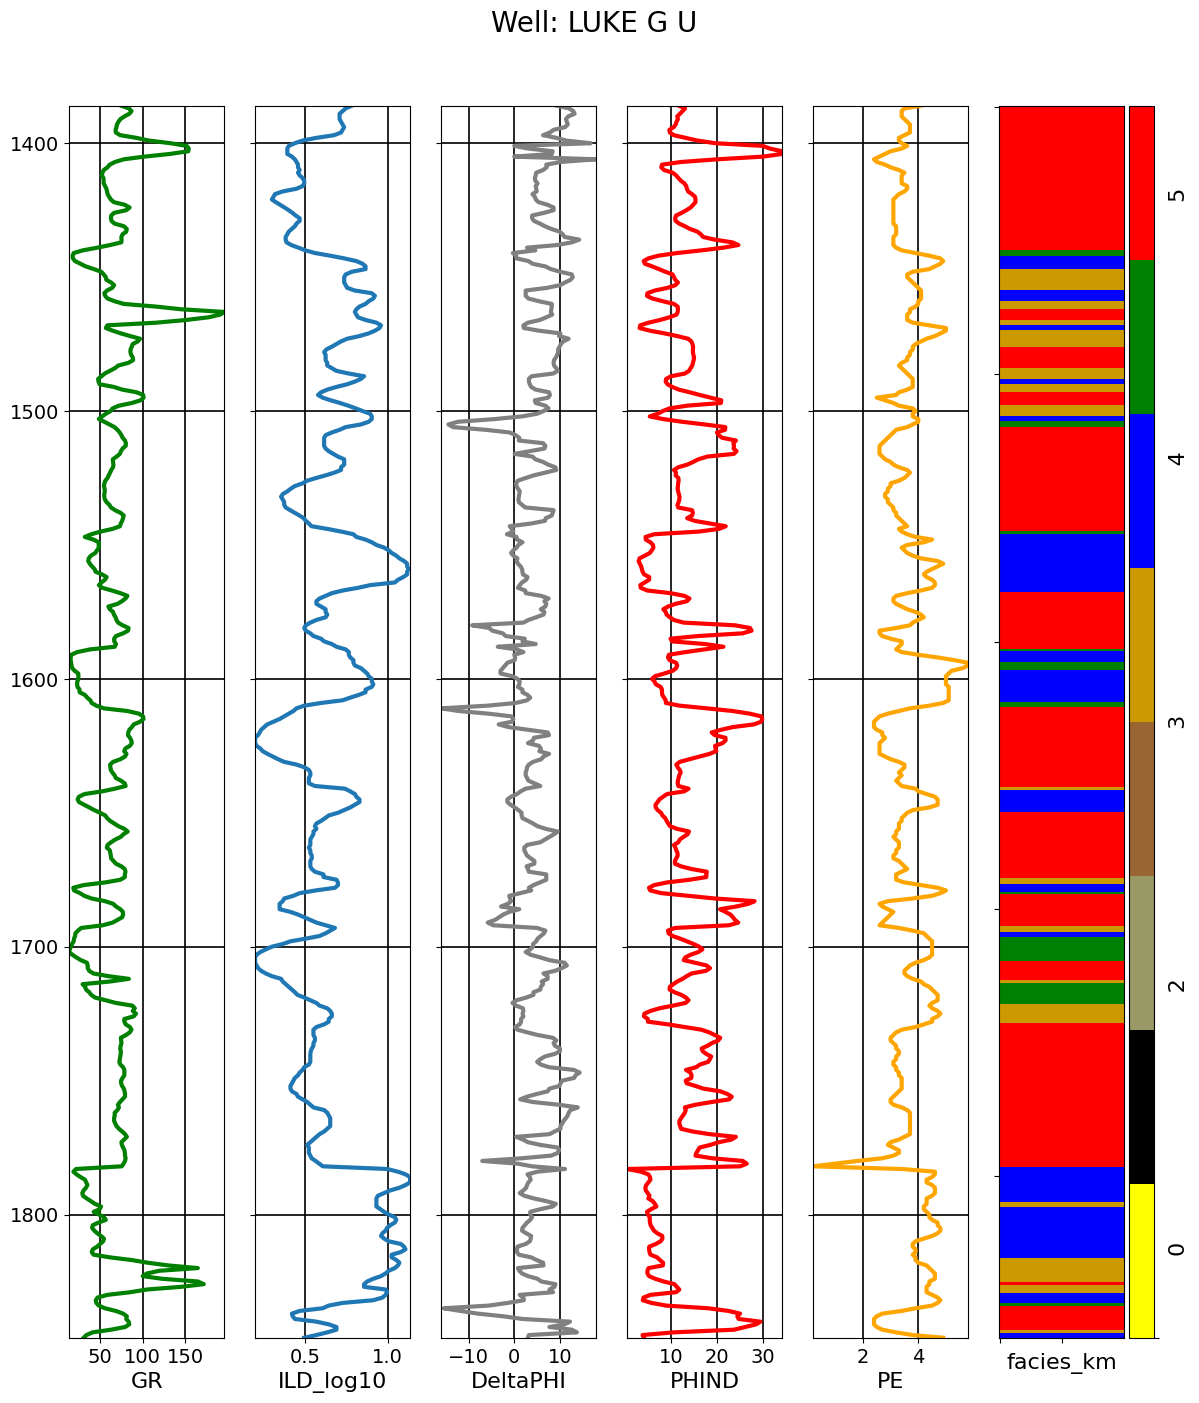

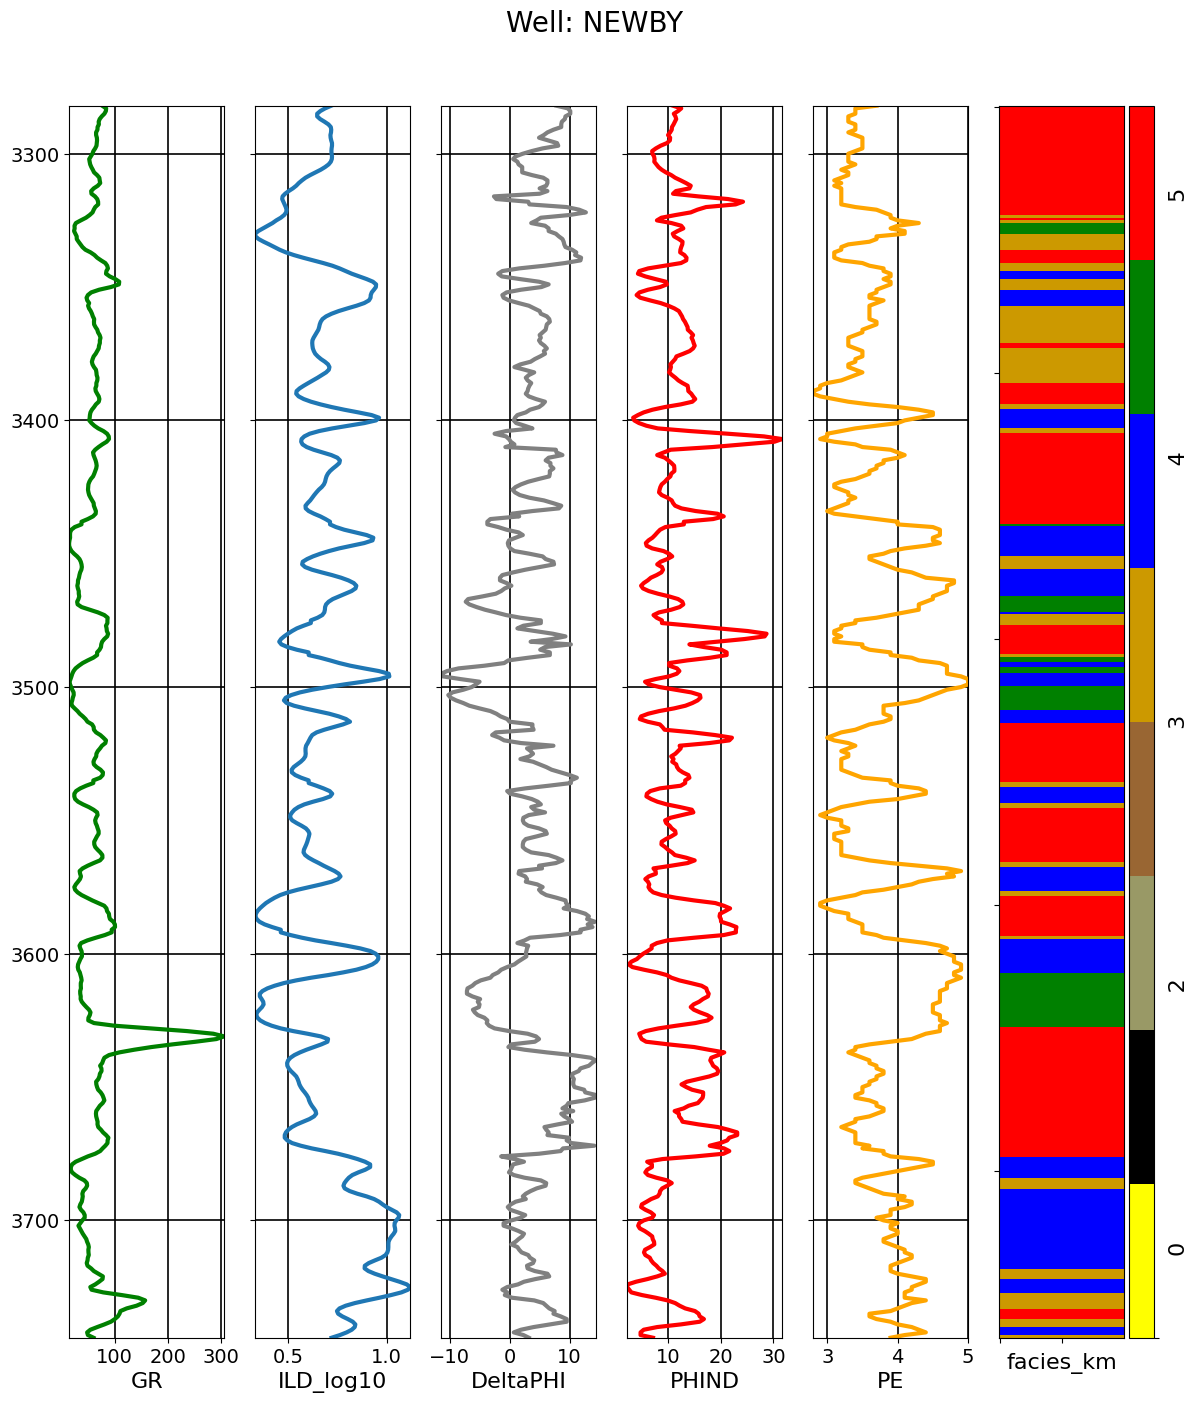

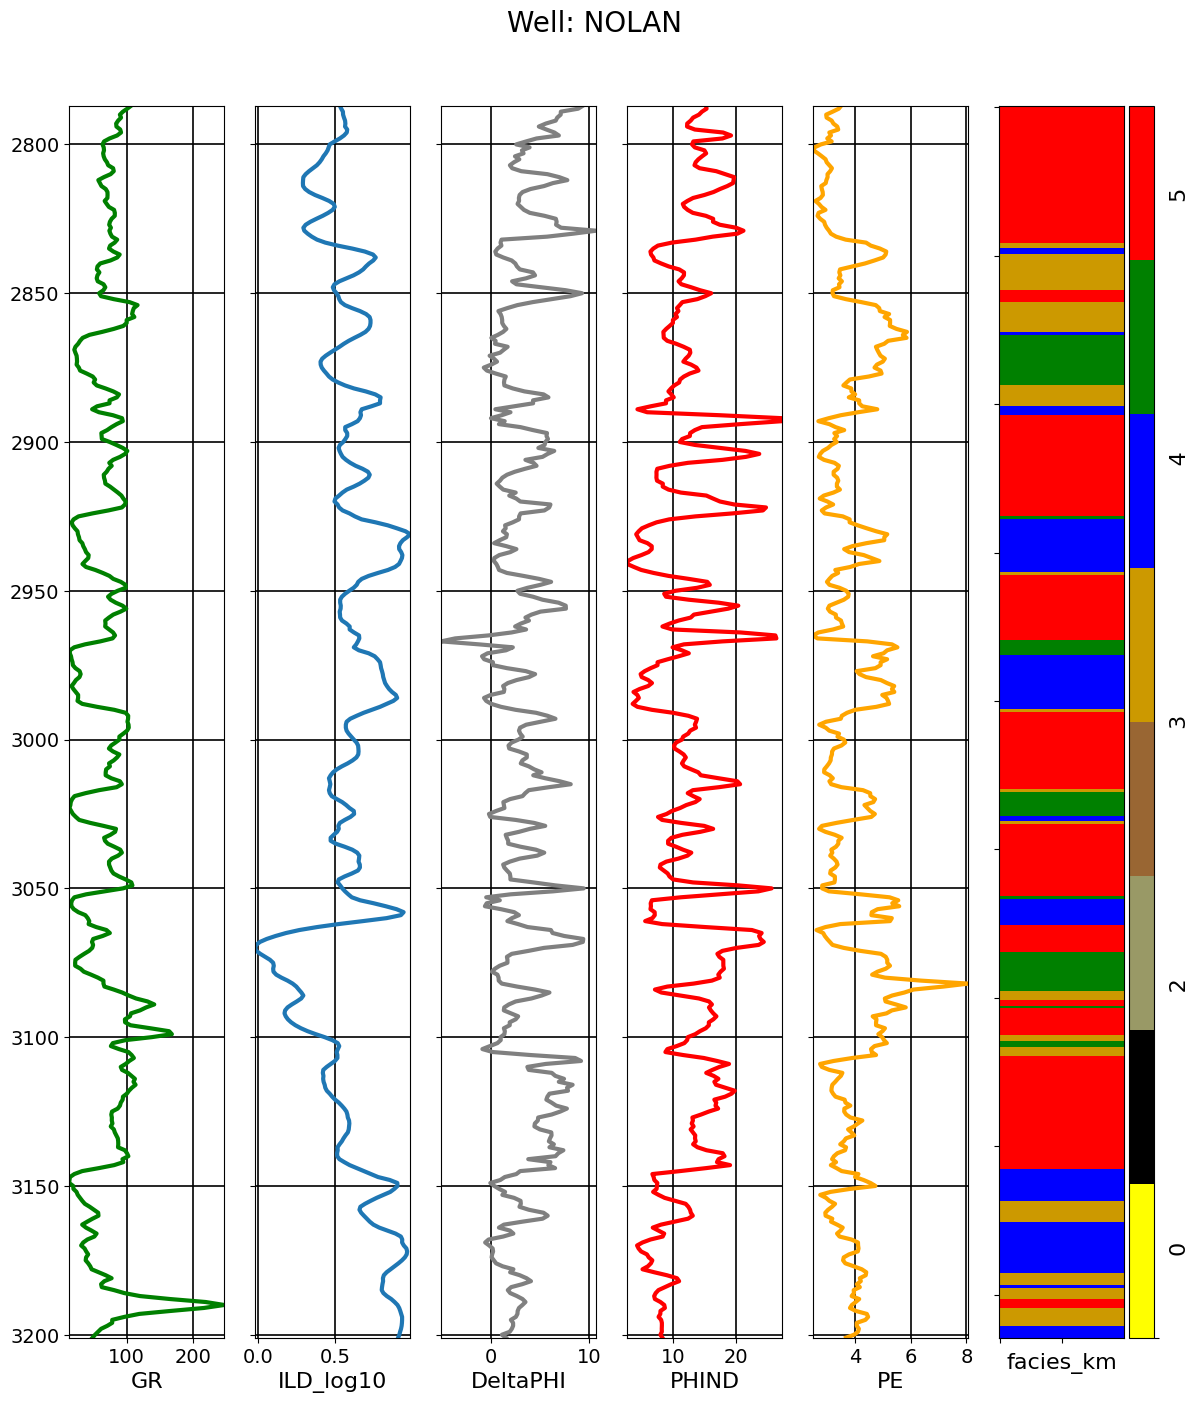

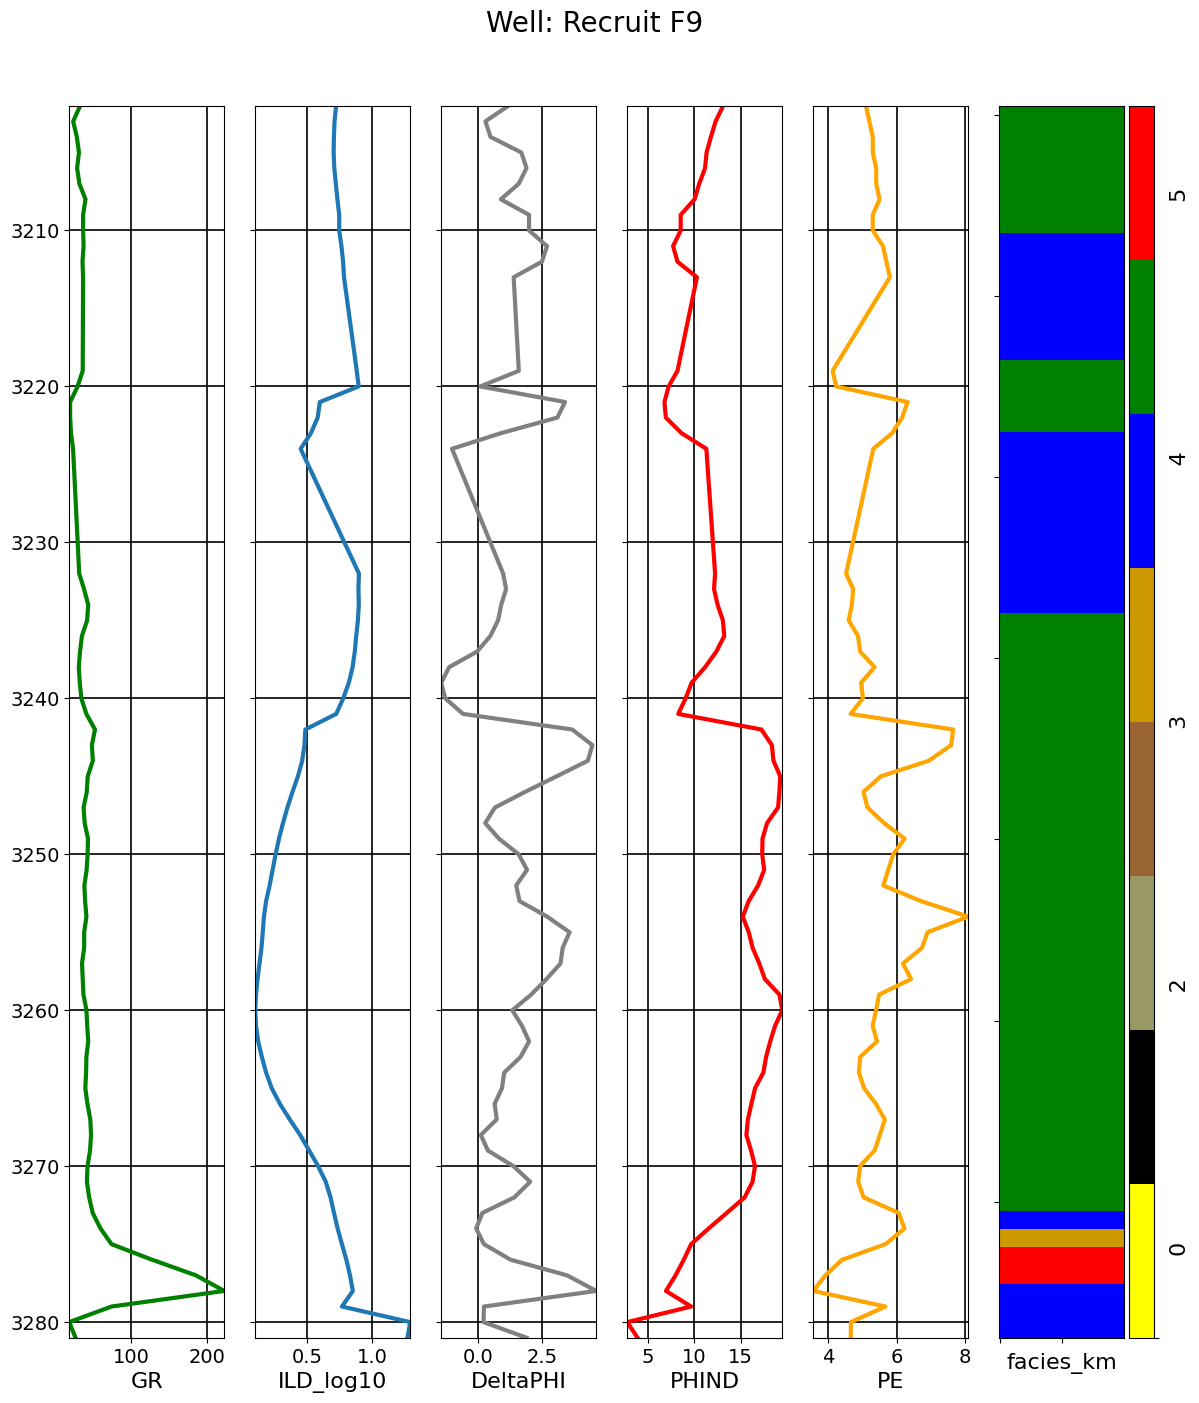

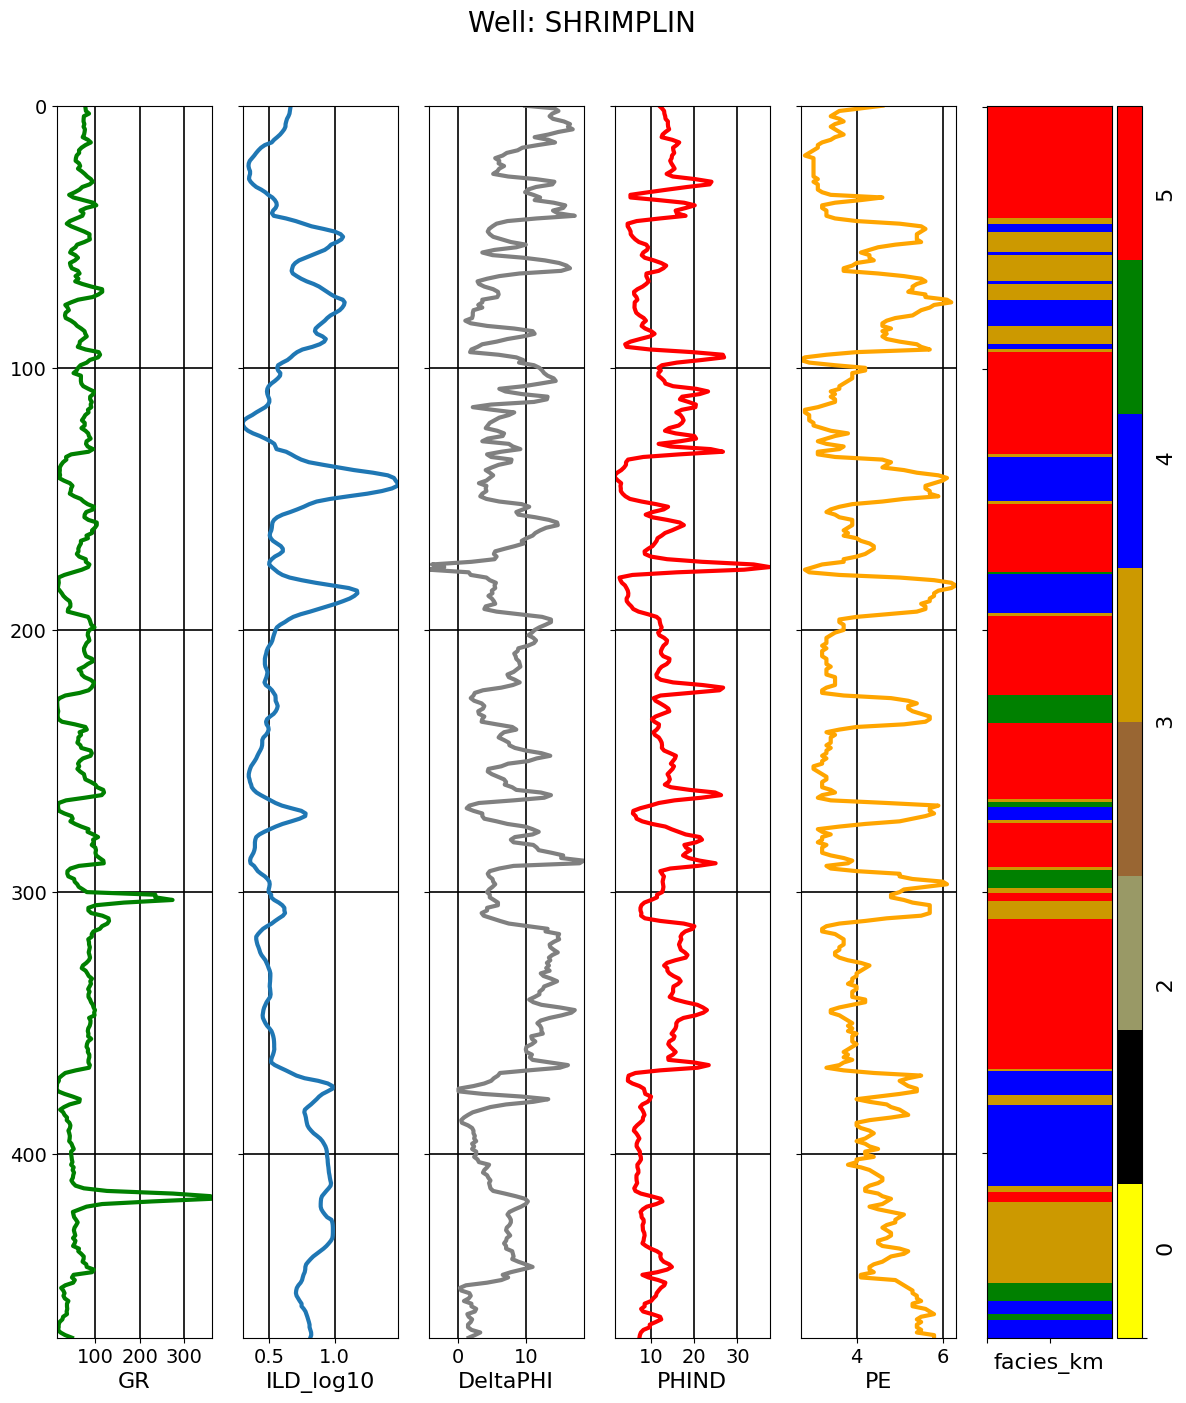

In [101]:
well_list = np.unique(input_df['Well Name'])
for i in well_list:
    make_facies_log_plot(input_df, i, 'facies_km')